# Data Pre-Processing

In [1]:
import pandas as pd
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [2]:
sales_data=df.copy()
sales_data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [3]:
sales_data.dropna(inplace=True)

In [4]:
sales_data['CustomerID']=sales_data['CustomerID'].astype('int')

In [5]:
sales_data['CustomerID']=sales_data['CustomerID'].astype('str')

In [6]:
sales_data['revenue']=sales_data['UnitPrice']*sales_data['Quantity']

In [7]:
sales_data['InvoiceDate']=pd.to_datetime(sales_data['InvoiceDate'])

In [8]:
columns=['InvoiceNo','InvoiceDate','CustomerID','revenue','Country']
sales_data=sales_data[columns]

# RFM Analysis

In [9]:
today_date=pd.to_datetime('2012-01-01')
rfm_dataset=sales_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda v:(today_date-v.max()).days,
    'InvoiceNo': 'count',
    'revenue': 'sum'
})
rfm_dataset

InvoiceDate  InvoiceNo  revenue
CustomerID                                 
12346               347          2     0.00
12347                24        182  4310.00
12348                97         31  1797.24
12349                40         73  1757.55
12350               332         17   334.40
...                 ...        ...      ...
18280               299         10   180.60
18281               202          7    80.82
18282                29         13   176.60
18283                25        756  2094.88
18287                64         70  1837.28

[4372 rows x 3 columns]

In [10]:
rfm_dataset.rename(columns={
    'InvoiceDate':'recency',
    'InvoiceNo':'frequency',
    'revenue':'monetary'
},inplace='True')
rfm_dataset

recency  frequency  monetary
CustomerID                              
12346           347          2      0.00
12347            24        182   4310.00
12348            97         31   1797.24
12349            40         73   1757.55
12350           332         17    334.40
...             ...        ...       ...
18280           299         10    180.60
18281           202          7     80.82
18282            29         13    176.60
18283            25        756   2094.88
18287            64         70   1837.28

[4372 rows x 3 columns]

In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_dataset[['recency', 'frequency', 'monetary']])
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['recency', 'frequency', 'monetary'])
rfm_scaled.head(10)

recency  frequency  monetary
0  2.316568  -0.391720 -0.231001
1 -0.889050   0.382657  0.293432
2 -0.164560  -0.266959 -0.012316
3 -0.730258  -0.086271 -0.017146
4  2.167700  -0.327188 -0.190312
5 -0.551616   0.008375 -0.042958
6  1.115702  -0.383116 -0.220172
7  1.393588  -0.150803 -0.099662
8  1.214947  -0.344397 -0.175102
9 -0.690559  -0.146500  0.111089

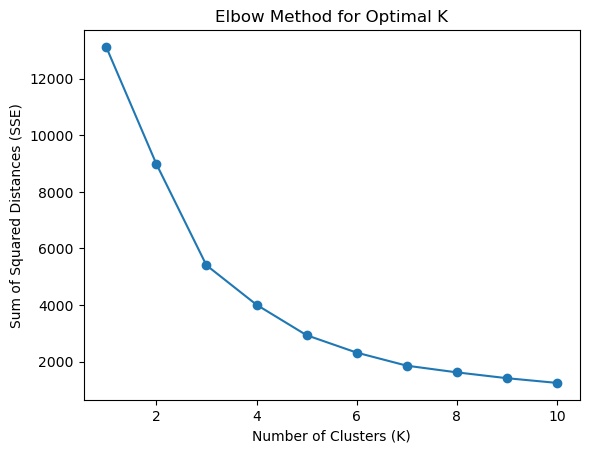

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings('ignore') 

# Defining the number of clusters
k = 3

# Applying KMeans clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(rfm_scaled)
silhouette_avg = silhouette_score(rfm_scaled, y_kmeans)
print("For n_clusters =", k, "The average silhouette_score is:", silhouette_avg)

y_kmeans
rfm_scaled['Clusters']=y_kmeans
rfm_dataset['Clusters']=y_kmeans

For n_clusters = 3 The average silhouette_score is: 0.6000464075533437


In [14]:
rfm_scaled

recency  frequency  monetary  Clusters
0     2.316568  -0.391720 -0.231001         1
1    -0.889050   0.382657  0.293432         0
2    -0.164560  -0.266959 -0.012316         0
3    -0.730258  -0.086271 -0.017146         0
4     2.167700  -0.327188 -0.190312         1
...        ...        ...       ...       ...
4367  1.840191  -0.357303 -0.209026         1
4368  0.877514  -0.370209 -0.221167         1
4369 -0.839427  -0.344397 -0.209513         0
4370 -0.879125   2.852058  0.023900         0
4371 -0.492069  -0.099177 -0.007444         0

[4372 rows x 4 columns]

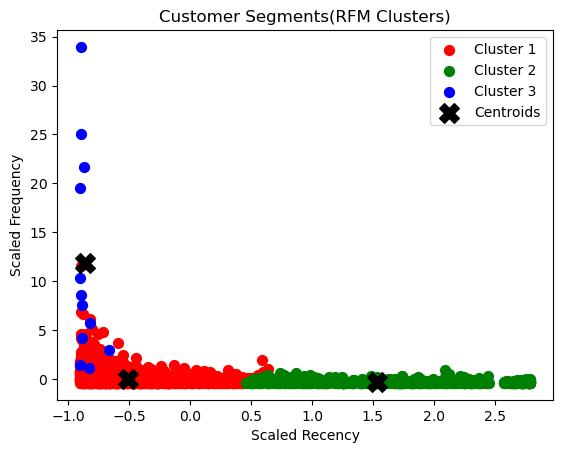

In [15]:
import warnings 
warnings.filterwarnings('ignore') 
recency = rfm_scaled['recency']
frequency = rfm_scaled['frequency']

plt.title('Customer Segments(RFM Clusters)')
plt.scatter(rfm_scaled[y_kmeans == 0]['recency'], rfm_scaled[y_kmeans == 0]['frequency'], s=50, c='red', label='Cluster 1')
plt.scatter(rfm_scaled[y_kmeans == 1]['recency'], rfm_scaled[y_kmeans == 1]['frequency'], s=50, c='green', label='Cluster 2')
plt.scatter(rfm_scaled[y_kmeans == 2]['recency'], rfm_scaled[y_kmeans == 2]['frequency'], s=50, c='blue', label='Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='yellow', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.legend()

plt.xlabel('Scaled Recency')
plt.ylabel('Scaled Frequency')
plt.show()

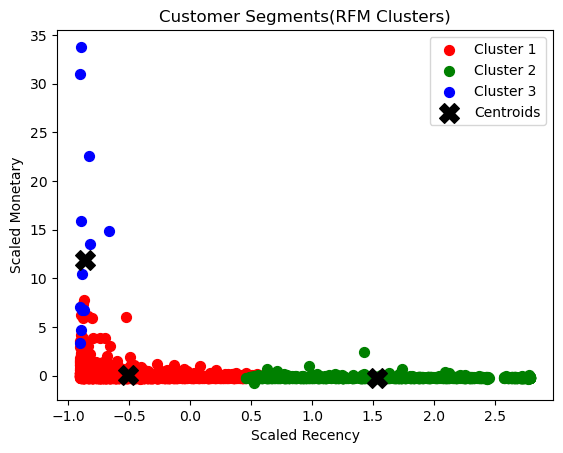

In [16]:
import warnings 
warnings.filterwarnings('ignore') 
recency = rfm_scaled['recency']
frequency = rfm_scaled['monetary']

plt.title('Customer Segments(RFM Clusters)')
plt.scatter(rfm_scaled[y_kmeans == 0]['recency'], rfm_scaled[y_kmeans == 0]['monetary'], s=50, c='red', label='Cluster 1')
plt.scatter(rfm_scaled[y_kmeans == 1]['recency'], rfm_scaled[y_kmeans == 1]['monetary'], s=50, c='green', label='Cluster 2')
plt.scatter(rfm_scaled[y_kmeans == 2]['recency'], rfm_scaled[y_kmeans == 2]['monetary'], s=50, c='blue', label='Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='yellow', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.legend()

plt.xlabel('Scaled Recency')
plt.ylabel('Scaled Monetary')
plt.show()

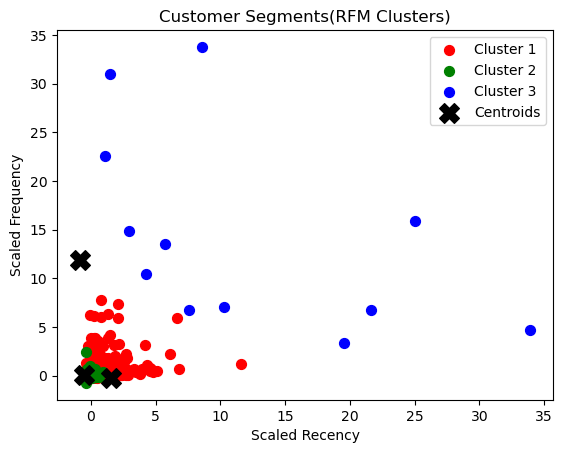

In [17]:
import warnings 
warnings.filterwarnings('ignore') 
recency = rfm_scaled['frequency']
frequency = rfm_scaled['monetary']

plt.title('Customer Segments(RFM Clusters)')
plt.scatter(rfm_scaled[y_kmeans == 0]['frequency'], rfm_scaled[y_kmeans == 0]['monetary'], s=50, c='red', label='Cluster 1')
plt.scatter(rfm_scaled[y_kmeans == 1]['frequency'], rfm_scaled[y_kmeans == 1]['monetary'], s=50, c='green', label='Cluster 2')
plt.scatter(rfm_scaled[y_kmeans == 2]['frequency'], rfm_scaled[y_kmeans == 2]['monetary'], s=50, c='blue', label='Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='yellow', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.legend()

plt.xlabel('Scaled Recency')
plt.ylabel('Scaled Frequency')
plt.show()

In [18]:
group=rfm_dataset.groupby(['Clusters']).agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
})
group

recency    frequency       monetary
Clusters                                        
0          61.665951   104.960123    1952.625725
1         268.390909    27.738182     463.590610
2          26.333333  2845.583333  118713.023333

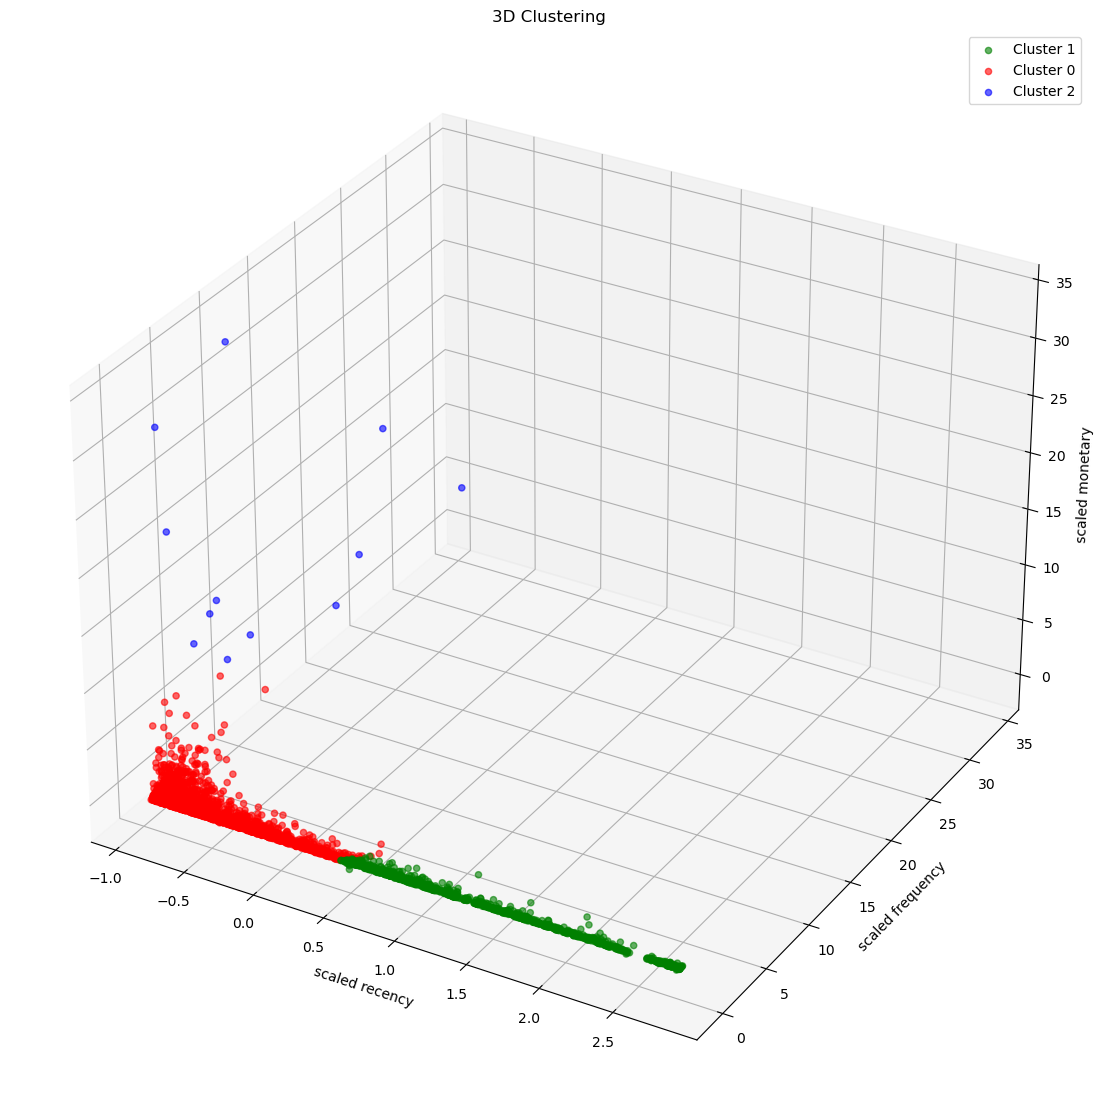

In [19]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')

# Define custom colors for each cluster
cluster_colors = {0: 'red', 1: 'green', 2: 'blue'}

# Scatter plot for each cluster
for cluster in rfm_scaled['Clusters'].unique():
    cluster_data = rfm_scaled[rfm_scaled['Clusters'] == cluster]
    ax.scatter(cluster_data['recency'], cluster_data['frequency'], cluster_data['monetary'], label=f'Cluster {cluster}',alpha=0.6,
        c=cluster_colors[cluster])

# Set labels and title
ax.set_xlabel('scaled recency')
ax.set_ylabel('scaled frequency')
ax.set_zlabel('scaled monetary')
ax.set_title('3D Clustering')

# Show legend
ax.legend()

In [20]:
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore') 

rfm_scaled_4=rfm_scaled
rfm_dataset_4=rfm_dataset
# Defining the number of clusters
k = 4

# Applying KMeans clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(rfm_scaled_4)
silhouette_avg = silhouette_score(rfm_scaled_4, y_kmeans)
print("For n_clusters =", k, "The average silhouette_score is:", silhouette_avg)
y_kmeans
rfm_scaled_4['Clusters']=y_kmeans
rfm_dataset_4['Clusters']=y_kmeans

For n_clusters = 4 The average silhouette_score is: 0.6479030827284805


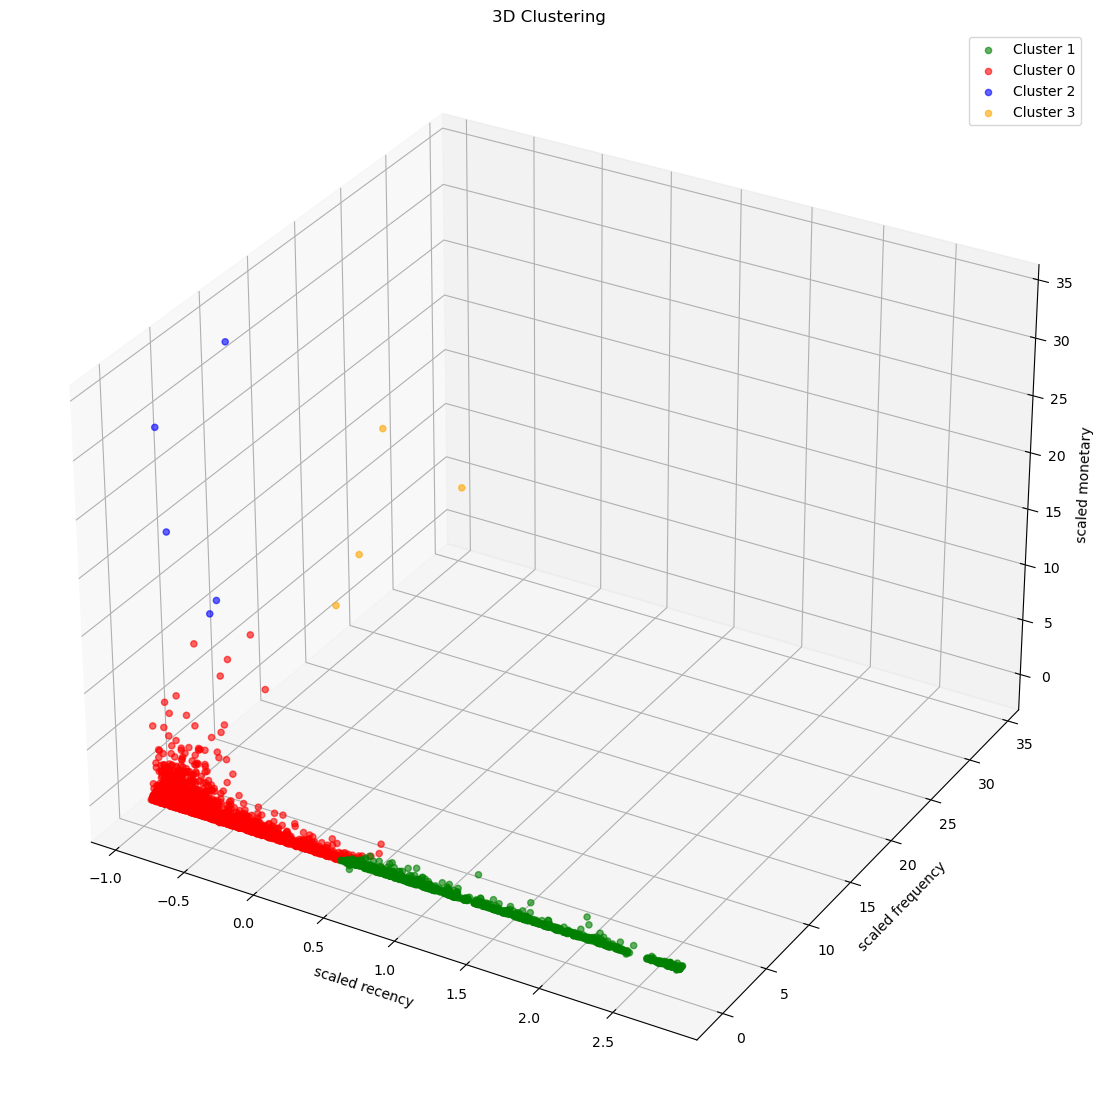

In [21]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')

# Define custom colors for each cluster
cluster_colors = {0: 'red', 1: 'green', 2: 'blue',3: 'orange'}
# Scatter plot for each cluster
for cluster in rfm_scaled_4['Clusters'].unique():
    cluster_data = rfm_scaled_4[rfm_scaled_4['Clusters'] == cluster]
    ax.scatter(cluster_data['recency'], cluster_data['frequency'], cluster_data['monetary'], label=f'Cluster {cluster}',alpha=0.6,
        c=cluster_colors[cluster])

# Set labels and title
ax.set_xlabel('scaled recency')
ax.set_ylabel('scaled frequency')
ax.set_zlabel('scaled monetary')
ax.set_title('3D Clustering')

# Show legend
ax.legend()

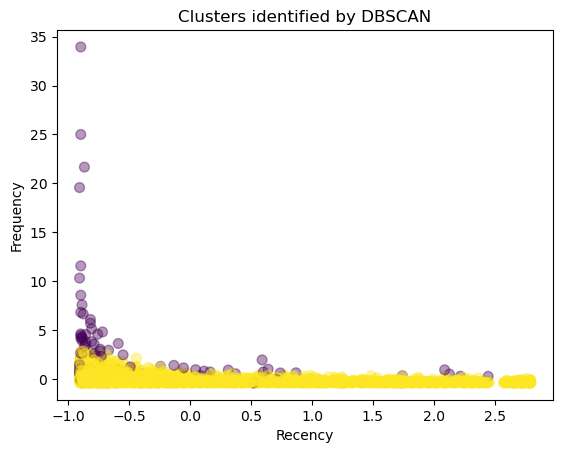

In [22]:
from sklearn.cluster import DBSCAN
X=rfm_scaled.iloc[:,[0,1,2]]
#print(X)
# Applying DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
clusters = dbscan.fit_predict(X)
X['Cluster']=clusters
#print(list(clusters))
# Visualizing the clusters
plt.scatter(X['recency'], X['frequency'], c=clusters, cmap='viridis', s=50,alpha=0.4)
plt.title('Clusters identified by DBSCAN')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

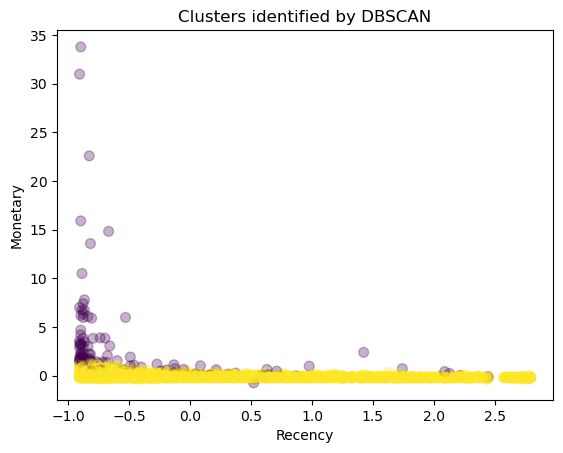

In [23]:
# Visualizing the clusters
plt.scatter(X['recency'], X['monetary'], c=clusters, cmap='viridis', s=50,alpha=0.3)
plt.title('Clusters identified by DBSCAN')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

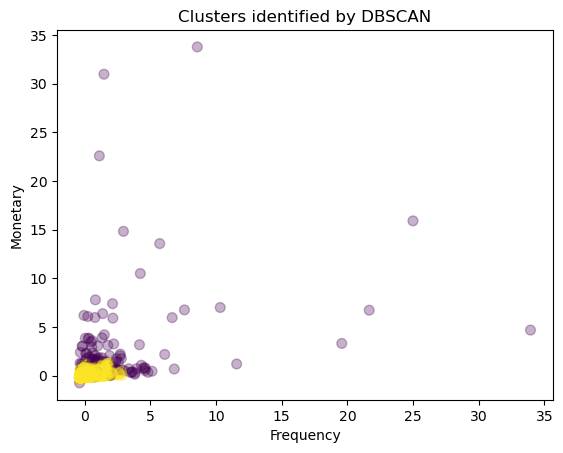

In [24]:
# Visualizing the clusters
plt.scatter(X['frequency'], X['monetary'], c=clusters, cmap='viridis', s=50,alpha=0.3)
plt.title('Clusters identified by DBSCAN')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

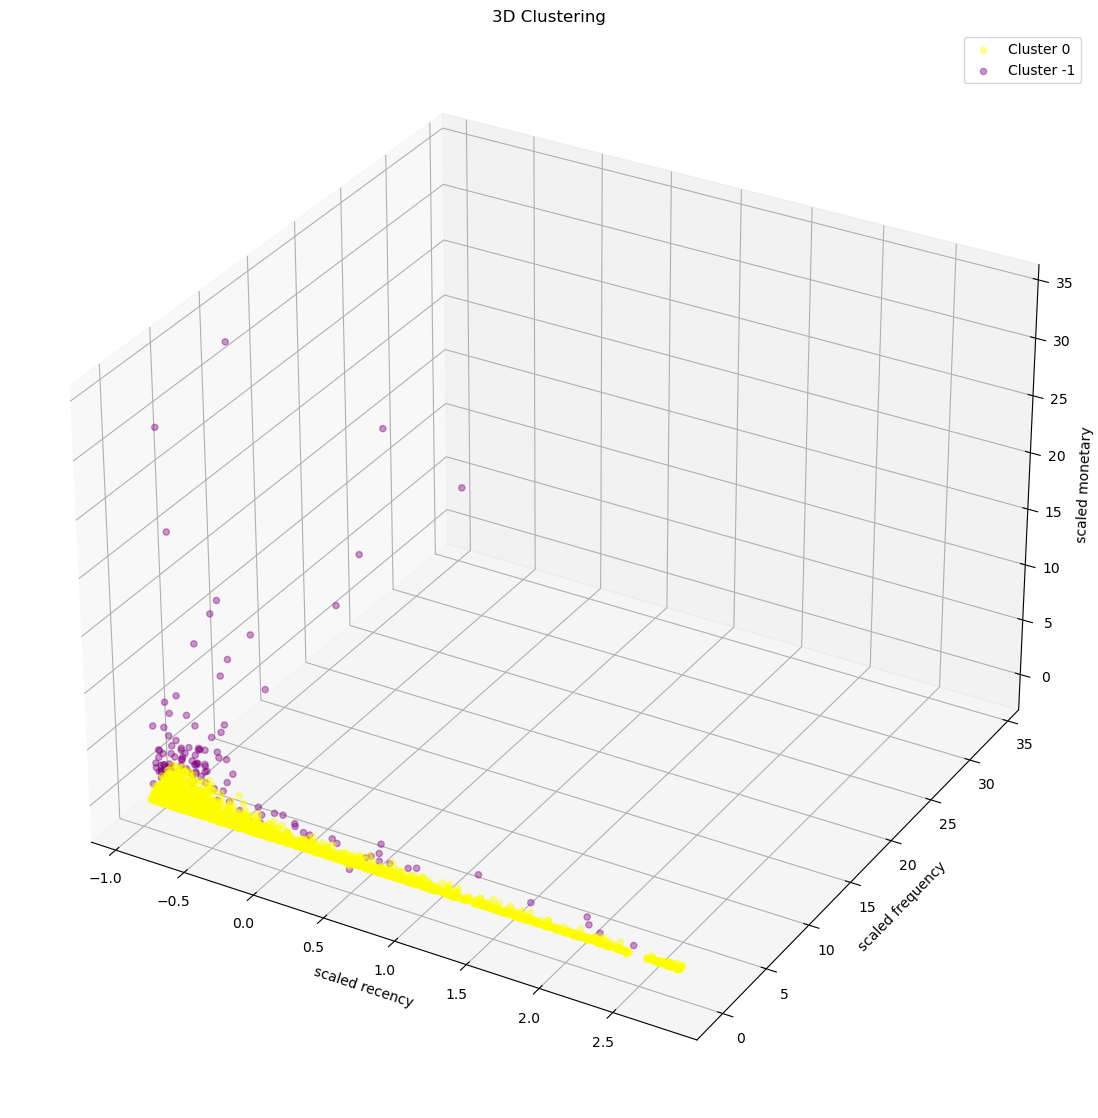

In [25]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')

# Define custom colors for each cluster
cluster_colors = {-1: 'purple', 0: 'yellow'}

# Scatter plot for each cluster
for cluster in X['Cluster'].unique():
    cluster_data = X[X['Cluster'] == cluster]
    ax.scatter(cluster_data['recency'], cluster_data['frequency'], cluster_data['monetary'], label=f'Cluster {cluster}',alpha=0.4,
        c=cluster_colors[cluster])

# Set labels and title
ax.set_xlabel('scaled recency')
ax.set_ylabel('scaled frequency')
ax.set_zlabel('scaled monetary')
ax.set_title('3D Clustering')

# Show legend
ax.legend()

In [26]:
silhouette_avg = silhouette_score(X, clusters)
print("For n_clusters =", 2, "The average silhouette_score is:", silhouette_avg)

For n_clusters = 2 The average silhouette_score is: 0.7323379888446669


In [27]:
import pandas as pd

# Assuming you have a DataFrame 'rfm_data' with columns 'Recency', 'Frequency', 'Monetary'
# Adjust column names based on your actual dataset

# Calculate quartiles for Recency, Frequency, and Monetary
recency_quartiles = pd.qcut(rfm_dataset['recency'], q=5, duplicates='drop', labels=False)
frequency_quartiles = pd.qcut(rfm_dataset['frequency'], q=5, duplicates='drop', labels=False)
monetary_quartiles = pd.qcut(rfm_dataset['monetary'], q=5, duplicates='drop', labels=False)

# Assign quartile scores to each customer
rfm_dataset['RecencyScore'] = recency_quartiles + 1  # Add 1 to start scores from 1
rfm_dataset['FrequencyScore'] = frequency_quartiles + 1
rfm_dataset['MonetaryScore'] = monetary_quartiles + 1

In [28]:
rfm_dataset

recency  frequency  monetary  Clusters  RecencyScore  \
CustomerID                                                         
12346           347          2      0.00         1             5   
12347            24        182   4310.00         0             1   
12348            97         31   1797.24         0             4   
12349            40         73   1757.55         0             2   
12350           332         17    334.40         1             5   
...             ...        ...       ...       ...           ...   
18280           299         10    180.60         1             5   
18281           202          7     80.82         1             5   
18282            29         13    176.60         0             1   
18283            25        756   2094.88         0             1   
18287            64         70   1837.28         0             3   

            FrequencyScore  MonetaryScore  
CustomerID                                 
12346                    1              1  
12347                    5              5  
12348                    3              4  
12349                    4              4  
12350                    2              2  
...                    ...            ...  
18280                    1              1  
18281                    1              1  
18282                    1              1  
18283                    5              5  
18287                    4              4  

[4372 rows x 7 columns]

In [29]:
def combine_rfm_scores(row):
    return int(row['RecencyScore'] * 100 + row['FrequencyScore'] * 10 + row['MonetaryScore'])

rfm_dataset['CustomRFMScore'] = rfm_dataset.apply(combine_rfm_scores, axis=1)

In [30]:
rfm_dataset

recency  frequency  monetary  Clusters  RecencyScore  \
CustomerID                                                         
12346           347          2      0.00         1             5   
12347            24        182   4310.00         0             1   
12348            97         31   1797.24         0             4   
12349            40         73   1757.55         0             2   
12350           332         17    334.40         1             5   
...             ...        ...       ...       ...           ...   
18280           299         10    180.60         1             5   
18281           202          7     80.82         1             5   
18282            29         13    176.60         0             1   
18283            25        756   2094.88         0             1   
18287            64         70   1837.28         0             3   

            FrequencyScore  MonetaryScore  CustomRFMScore  
CustomerID                                                 
12346                    1              1             511  
12347                    5              5             155  
12348                    3              4             434  
12349                    4              4             244  
12350                    2              2             522  
...                    ...            ...             ...  
18280                    1              1             511  
18281                    1              1             511  
18282                    1              1             111  
18283                    5              5             155  
18287                    4              4             344  

[4372 rows x 8 columns]

In [31]:
rfm = rfm_dataset
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Lose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

In [32]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

recency  frequency  monetary  Clusters  RecencyScore  \
CustomerID                                                         
12346           347          2      0.00         1             5   
12347            24        182   4310.00         0             1   
12348            97         31   1797.24         0             4   
12349            40         73   1757.55         0             2   
12350           332         17    334.40         1             5   

            FrequencyScore  MonetaryScore  CustomRFMScore Segment  
CustomerID                                                         
12346                    1              1             511      51  
12347                    5              5             155      15  
12348                    3              4             434      43  
12349                    4              4             244      24  
12350                    2              2             522      52

In [33]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm

recency  frequency  monetary  Clusters  RecencyScore  \
CustomerID                                                         
12346           347          2      0.00         1             5   
12347            24        182   4310.00         0             1   
12348            97         31   1797.24         0             4   
12349            40         73   1757.55         0             2   
12350           332         17    334.40         1             5   
...             ...        ...       ...       ...           ...   
18280           299         10    180.60         1             5   
18281           202          7     80.82         1             5   
18282            29         13    176.60         0             1   
18283            25        756   2094.88         0             1   
18287            64         70   1837.28         0             3   

            FrequencyScore  MonetaryScore  CustomRFMScore              Segment  
CustomerID                                                                      
12346                    1              1             511        New_Customers  
12347                    5              5             155            Cant_Lose  
12348                    3              4             434  Potential_Loyalists  
12349                    4              4             244              At_Risk  
12350                    2              2             522  Potential_Loyalists  
...                    ...            ...             ...                  ...  
18280                    1              1             511        New_Customers  
18281                    1              1             511        New_Customers  
18282                    1              1             111          Hibernating  
18283                    5              5             155            Cant_Lose  
18287                    4              4             344      Loyal_Customers  

[4372 rows x 9 columns]

In [34]:
rfm_coordinates = {"Champions": [3, 5, 0.8, 1],
                   "Loyal_Customers": [3, 5, 0.4, 0.8],
                   "Cant_Lose": [4, 5, 0, 0.4],
                   "At_Risk": [2, 4, 0, 0.4],
                   "Hibernating": [0, 2, 0, 0.4],
                   "About_to_Sleep": [0, 2, 0.4, 0.6],
                   "Promising": [0, 1, 0.6, 0.8],
                   "New_Customers": [0, 1, 0.8, 1],
                   "Potential_Loyalists": [1, 3, 0.6, 1],
                   "Need_Attention": [2, 3, 0.4, 0.6]}

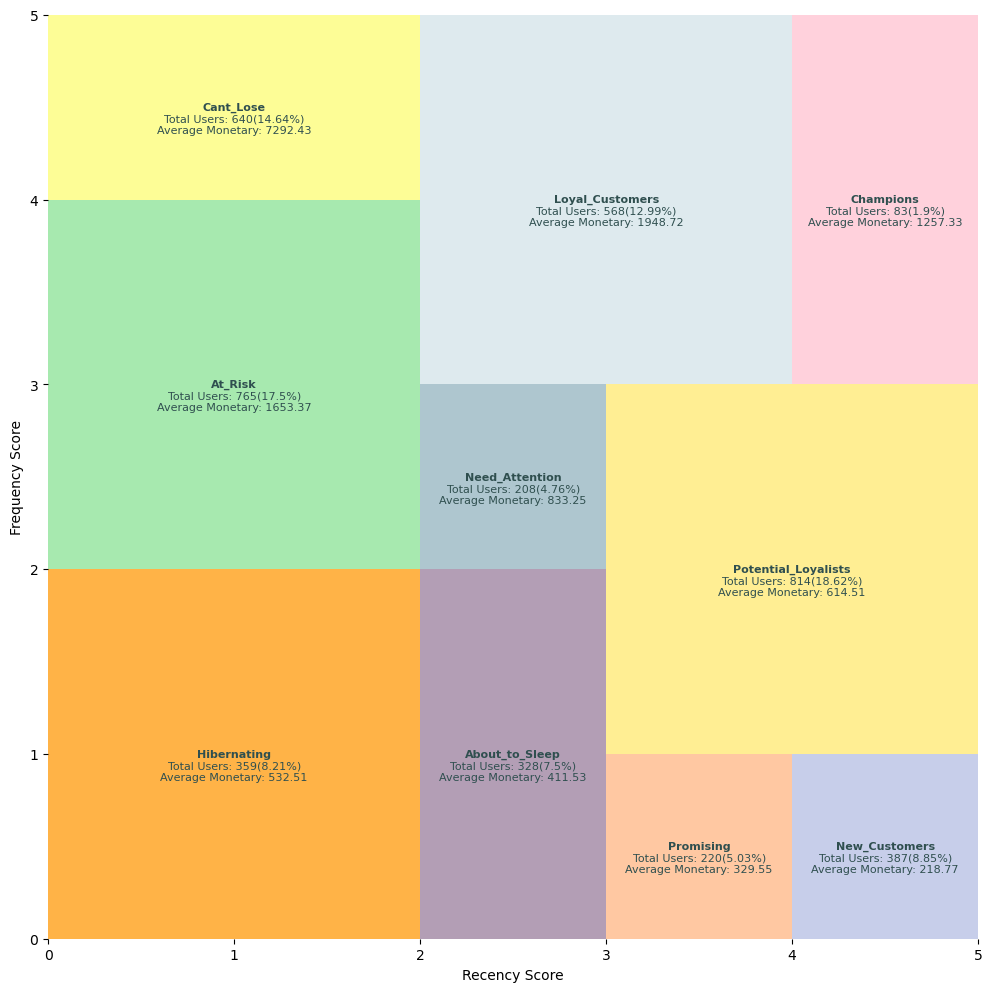

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (12, 12))

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

plt.rcParams["axes.facecolor"] = "white"
palette = [
    "#FFD1DC",  
    "#DEEAEE",  
    "#FDFD96",  
    "#A7E9AF",  
    "#FFB347",  
    "#B39EB5",  
    "#FFC8A2",  
    "#C7CEEA",  
    "#FFEE93",  
    "#AEC6CF"   
]

for key, color in zip(rfm_coordinates.keys(), palette[:10]):
    
    coordinates = rfm_coordinates[key]
    ymin, ymax, xmin, xmax = coordinates[0], coordinates[1], coordinates[2], coordinates[3]
    
    ax.axhspan(ymin = ymin, ymax = ymax, xmin = xmin, xmax = xmax, facecolor = color)
    
    users = rfm[rfm.Segment == key].shape[0]
    users_percentage = (rfm[rfm.Segment == key].shape[0] / rfm.shape[0]) * 100
    avg_monetary = rfm[rfm.Segment == key]["monetary"].mean()
    
    user_txt = "\n\nTotal Users: " + str(users) + "(" +  str(round(users_percentage, 2)) + "%)"
    monetary_txt = "\n\n\n\nAverage Monetary: " + str(round(avg_monetary, 2))
    
    x = 5 * (xmin + xmax) / 2
    y = (ymin + ymax) / 2
    
    plt.text(x = x, y = y, s = key, ha = "center", va = "center", fontsize = 8, color = "darkslategray", fontweight = "bold")
    plt.text(x = x, y = y, s = user_txt, ha = "center", va = "center", fontsize = 8, color = "darkslategray")    
    plt.text(x = x, y = y, s = monetary_txt, ha = "center", va = "center", fontsize = 8, color = "darkslategray")    
    
    ax.set_xlabel("Recency Score")
    ax.set_ylabel("Frequency Score")
    
sns.despine(left = True, bottom = True)
plt.show()

# Q1Data Overview
o What is the size of the dataset in terms of the number of rows and columns?
o Can you provide a brief description of each column in the dataset?
o What is the time period covered by this dataset?

In [36]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 541909
Number of columns: 8


In [37]:
column_descriptions = df.dtypes
print("\nColumn Descriptions:")
print(column_descriptions)


Column Descriptions:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [38]:
start_date = df['InvoiceDate'].min()
end_date = df['InvoiceDate'].max()
print(f"Time period covered by the dataset: {start_date} to {end_date}")

Time period covered by the dataset: 1/10/2011 10:04 to 9/9/2011 9:52


In [39]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [40]:
distinct_values_count_column = df['InvoiceNo'].nunique()
print(f"Count of Distinct Values in 'ColumnName': {distinct_values_count_column}")

Count of Distinct Values in 'ColumnName': 25900


In [41]:
distinct_values_count_column = df['StockCode'].nunique()
print(f"Count of Distinct Values in 'ColumnName': {distinct_values_count_column}")

Count of Distinct Values in 'ColumnName': 4070


In [42]:
distinct_values_count_column = df['Description'].nunique()
print(f"Count of Distinct Values in 'ColumnName': {distinct_values_count_column}")

Count of Distinct Values in 'ColumnName': 4223


In [43]:
distinct_values_count_column = df['CustomerID'].nunique()
print(f"Count of Distinct Values in 'ColumnName': {distinct_values_count_column}")

Count of Distinct Values in 'ColumnName': 4372


In [44]:
distinct_values_count_column = df['Country'].nunique()
print(f"Count of Distinct Values in 'ColumnName': {distinct_values_count_column}")

Count of Distinct Values in 'ColumnName': 38


# Q2 Customer Analysis
o How many unique customers are there in the dataset?
o What is the distribution of the number of orders per customer?
o Can you identify the top 5 customers who have made the most purchases by order
count?

In [113]:
order_counts = df.groupby(['CustomerID', 'InvoiceNo', 'Country']).size().reset_index(name='item_count_per_order')
# Removing return orders from dataframe
orders = order_counts[~order_counts['InvoiceNo'].str.startswith('C')]
orders

CustomerID InvoiceNo         Country  item_count_per_order
0         12346.0    541431  United Kingdom                     1
2         12347.0    537626         Iceland                    31
3         12347.0    542237         Iceland                    29
4         12347.0    549222         Iceland                    24
5         12347.0    556201         Iceland                    18
...           ...       ...             ...                   ...
22185     18283.0    579673  United Kingdom                    52
22186     18283.0    580872  United Kingdom                    50
22187     18287.0    554065  United Kingdom                    29
22188     18287.0    570715  United Kingdom                    38
22189     18287.0    573167  United Kingdom                     3

[18536 rows x 4 columns]

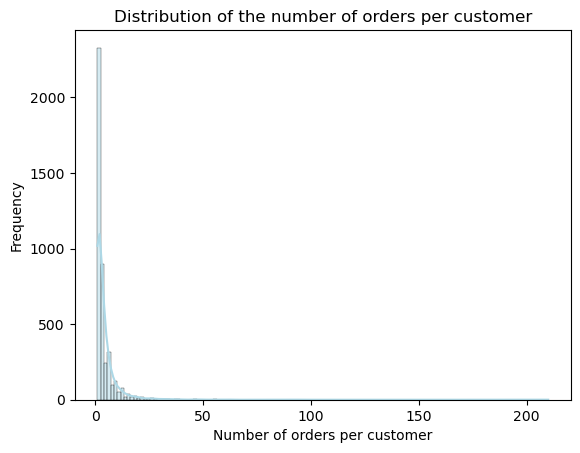

In [114]:
orders_per_customer = orders['CustomerID'].value_counts()
num_bins = int(np.sqrt(len(orders)))
sns.histplot(orders_per_customer, bins=num_bins, color='lightblue', kde = True)

# Add labels and title
plt.xlabel('Number of orders per customer')
plt.ylabel('Frequency')
plt.title('Distribution of the number of orders per customer')

# Show the plot
plt.show()


In [116]:
orders['CustomerID'].value_counts().head(5)


12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
Name: CustomerID, dtype: int64

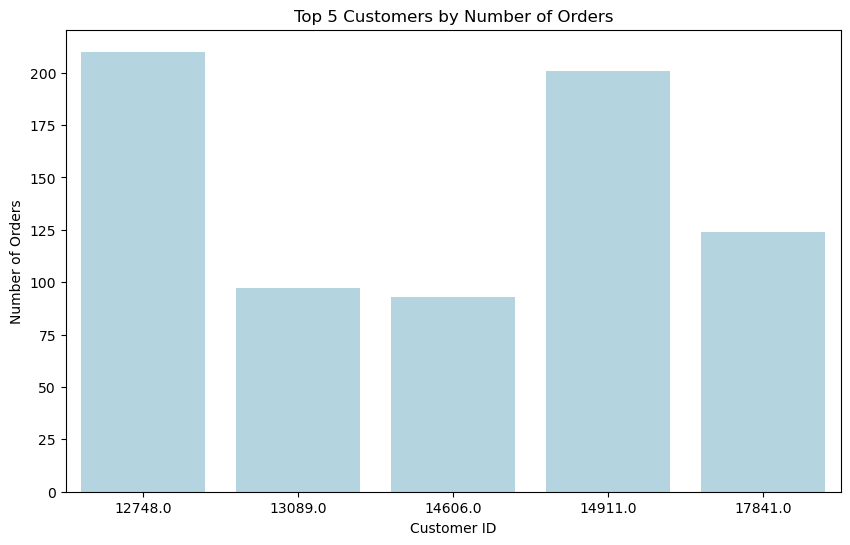

In [115]:
# Get the top 5 most frequent customer IDs
top_customers = orders['CustomerID'].value_counts().head(5)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, color='lightblue')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Top 5 Customers by Number of Orders')
plt.show()

# Q3 Product Analysis
o What are the top 10 most frequently purchased products?
o What is the average price of products in the dataset?
o Can you find out which product category generates the highest revenue?

In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from wordcloud import WordCloud
from collections import Counter

In [49]:
df.dropna(axis = 0, subset = ['Description'], inplace = True)
print('Dataframe dimensions:', df.shape)
print(df['Description'].head())
print(df.shape)

Dataframe dimensions: (540455, 8)
0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
Name: Description, dtype: object
(540455, 8)


In [50]:
df_desc = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})
print(df_desc.shape)
print(df_desc)

(4223, 1)
                              Description
0      WHITE HANGING HEART T-LIGHT HOLDER
1                     WHITE METAL LANTERN
2          CREAM CUPID HEARTS COAT HANGER
3     KNITTED UNION FLAG HOT WATER BOTTLE
4          RED WOOLLY HOTTIE WHITE HEART.
...                                   ...
4218                      ????damages????
4219                             mixed up
4220                                 lost
4221   CREAM HANGING HEART T-LIGHT HOLDER
4222          PAPER CRAFT , LITTLE BIRDIE

[4223 rows x 1 columns]


In [51]:
# explore the punctuations in the data
find_dict={}
newp='"#$%&\'()*+-/:;<=>@[\]^_`{|}~.?'
for i, row in df_desc.iterrows():
    for c in newp:
        #print(c)
        #print(row)
        if c in row['Description']:
            val=find_dict.get(c,'')
            find_dict[c]=val+'|'+row['Description']
            #print('find:',c)
           # print(row['Description'])
#print(list(find_dict))

In [52]:
def punc_processing(st):
    for i,c in enumerate(list(st)):
        if c == '\'':
            #clean example like 'n'
            if i==0:
                #print(st)
                st_clean=st[1:(len(st)-1)]
                #print(st_clean)
                return st_clean
            #clean example like b'fly
            if i==1:
                #print(st)
                st_clean=st[2:]
                #print(st_clean)
                return st_clean
            #clean example like mother's
            if i!=0 and st[i-1]!=' ':
                #print(st)
                st_clean=st[:(i)]+st[(i+2):]
                #print(st_clean)
                return st_clean
        if c == '"':
            #clean example like "glamorous"
            if i==0:
                #print(st)
                st_clean=st[1:(len(st)-1)]
                #print(st_clean)
                return st_clean        
    return st

In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pratham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/pratham/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
newp='["&\'()+-/[\].]'
front_quotation='[\"\'(]'
end_quotation='[\"\')]'
connect_quotation='&/+,'
toker = RegexpTokenizer('[a-z]+'+newp+'[a-z]+|[a-z]+|'+front_quotation+'[a-z]+'+end_quotation)
wordnet_lemmatizer=WordNetLemmatizer()
stopWords = set(stopwords.words('english'))
stopWords.update(['small', 'large', 'jumbo', 'set', 'pink', 'blue', 'tag', 'red', 'white'])
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

df_desc['token']=None
df_desc['token_list']=None
token_list_values = []
token_values = []

for i, row in df_desc.iterrows():
    descp_st=row['Description'].lower()
    for quot in connect_quotation:
        descp_st=descp_st.replace(quot, ' '+quot+' ')
    #Tokenization
    descp_l=toker.tokenize(descp_st)
    #Punctuation pre-processing
    descp_l=[punc_processing(x) for x in descp_l]
    #Stop words removal
    descp_l2=[x for x in descp_l if x not in stopWords ]
    
    #test if use steming to pre-process
    #descp_l2=[stemmer.stem(x) for x in descp_l2]
    
    #Lematization
    token_list_values.append(descp_l2)
    token_values.append(' '.join(descp_l2))

# Assign lists to DataFrame columns after the loop
df_desc['token_list'] = token_list_values
df_desc['token'] = token_values

In [56]:
#test if punctation are filttered correctly
find_dict={}
newp='"#$%&\'()*+-/:;<=>@[\]^_`{|}~.?'
for i, row in df_desc.iterrows():
    for c in newp:
        if c in row['Description']:
            #print('Punctuation:',c)
            #print('Original description:',row['Description'])
            #print('After pre-processing:',row['token_list'], '\n')
            newp.replace(c, '')
            break

In [57]:
# print(df_desc[['Description','token_list']])
# vectorizer = CountVectorizer(min_df=1)

# data_desc_doc = vectorizer.fit_transform(df_desc['token'])
# feature_name = vectorizer.get_feature_names()

# print('Number of words appeared in corpus:', len(feature_name))
# print('Example of words appeared in corpus(not all listed):',feature_name[:30], '\n')
# print(df_desc.head(1))
# print(data_desc_doc)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)
data_desc_doc = vectorizer.fit_transform(df_desc['token'])

# The attribute 'get_feature_names()' should be available after fitting the vectorizer
feature_names = vectorizer.get_feature_names_out()

# print('Number of words appeared in corpus:', len(feature_names))
# print('Example of words appeared in corpus(not all listed):', feature_names[:30], '\n')
print(df_desc.head(1))
print(data_desc_doc)


                          Description                         token  \
0  WHITE HANGING HEART T-LIGHT HOLDER  hanging heart t-light holder   

                          token_list  
0  [hanging, heart, t-light, holder]  
  (0, 887)	1
  (0, 900)	1
  (0, 1078)	1
  (0, 927)	1
  (1, 1172)	1
  (1, 1047)	1
  (2, 473)	1
  (2, 501)	1
  (2, 901)	1
  (2, 406)	1
  (2, 885)	1
  (3, 1029)	1
  (3, 2014)	1
  (3, 717)	1
  (3, 942)	1
  (3, 2055)	1
  (3, 185)	1
  (4, 900)	1
  (4, 2095)	1
  (4, 943)	1
  (5, 63)	1
  (5, 1264)	1
  (5, 196)	1
  (6, 1078)	1
  (6, 927)	1
  :	:
  (4211, 1887)	1
  (4211, 1986)	1
  (4211, 291)	1
  (4211, 2108)	1
  (4212, 2067)	1
  (4213, 1105)	1
  (4215, 1582)	1
  (4215, 1069)	1
  (4215, 156)	1
  (4215, 1012)	1
  (4216, 2067)	1
  (4217, 196)	1
  (4217, 2067)	1
  (4218, 523)	1
  (4219, 1200)	1
  (4220, 1105)	1
  (4221, 887)	1
  (4221, 900)	1
  (4221, 1078)	1
  (4221, 927)	1
  (4221, 473)	1
  (4222, 1350)	1
  (4222, 466)	1
  (4222, 1091)	1
  (4222, 144)	1


In [58]:
print(data_desc_doc.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [59]:
def findBestN(matrix):
    for n in range(3,15):
        kmeans = KMeans(n_clusters = n, n_init=20, random_state=0 )
        kmeans.fit(matrix)
        clusters = kmeans.predict(matrix)
        silhouette_avg = silhouette_score(matrix, clusters)
        print("For n_clusters =", n, "The average silhouette_score is :", silhouette_avg)      
# findBestN(data_desc_doc)

Cluster 1 Top Words:
egg: 57
easter: 13
cup: 12
basket: 8
felt: 7
pan: 7
cosy: 6
frying: 6
bunny: 6
rabbit: 5
Cluster 2 Top Words:
home: 44
sweet: 21
doormat: 3
stool: 2
holder: 2
peg: 2
hanger: 2
fancy: 1
font: 1
spotty: 1
Cluster 3 Top Words:
vintage: 157
tin: 12
number: 11
tile: 11
font: 11
leaf: 11
doily: 11
earrings: 9
mug: 7
bead: 7
Cluster 4 Top Words:
christmas: 136
tree: 29
vintage: 23
star: 10
cm: 9
gift: 9
card: 8
bag: 8
wrap: 6
cards: 6
Cluster 5 Top Words:
bag: 163
vintage: 26
design: 19
lunch: 18
charm: 18
paisley: 13
retrospot: 12
glass: 12
gift: 11
charlotte: 10
Cluster 6 Top Words:
box: 136
trinket: 12
tissue: 10
money: 10
design: 10
vintage: 9
lunch: 9
candle: 9
gift: 9
retrospot: 7
Cluster 7 Top Words:
heart: 202
decoration: 25
love: 20
hanging: 19
ivory: 14
beaded: 13
zinc: 12
wicker: 11
felt: 11
bell: 10
Cluster 8 Top Words:
flower: 98
design: 89
wall: 88
metal: 86
necklace: 86
rose: 80
black: 78
paper: 76
art: 75
green: 68
Cluster 9 Top Words:
holder: 106
t-light:

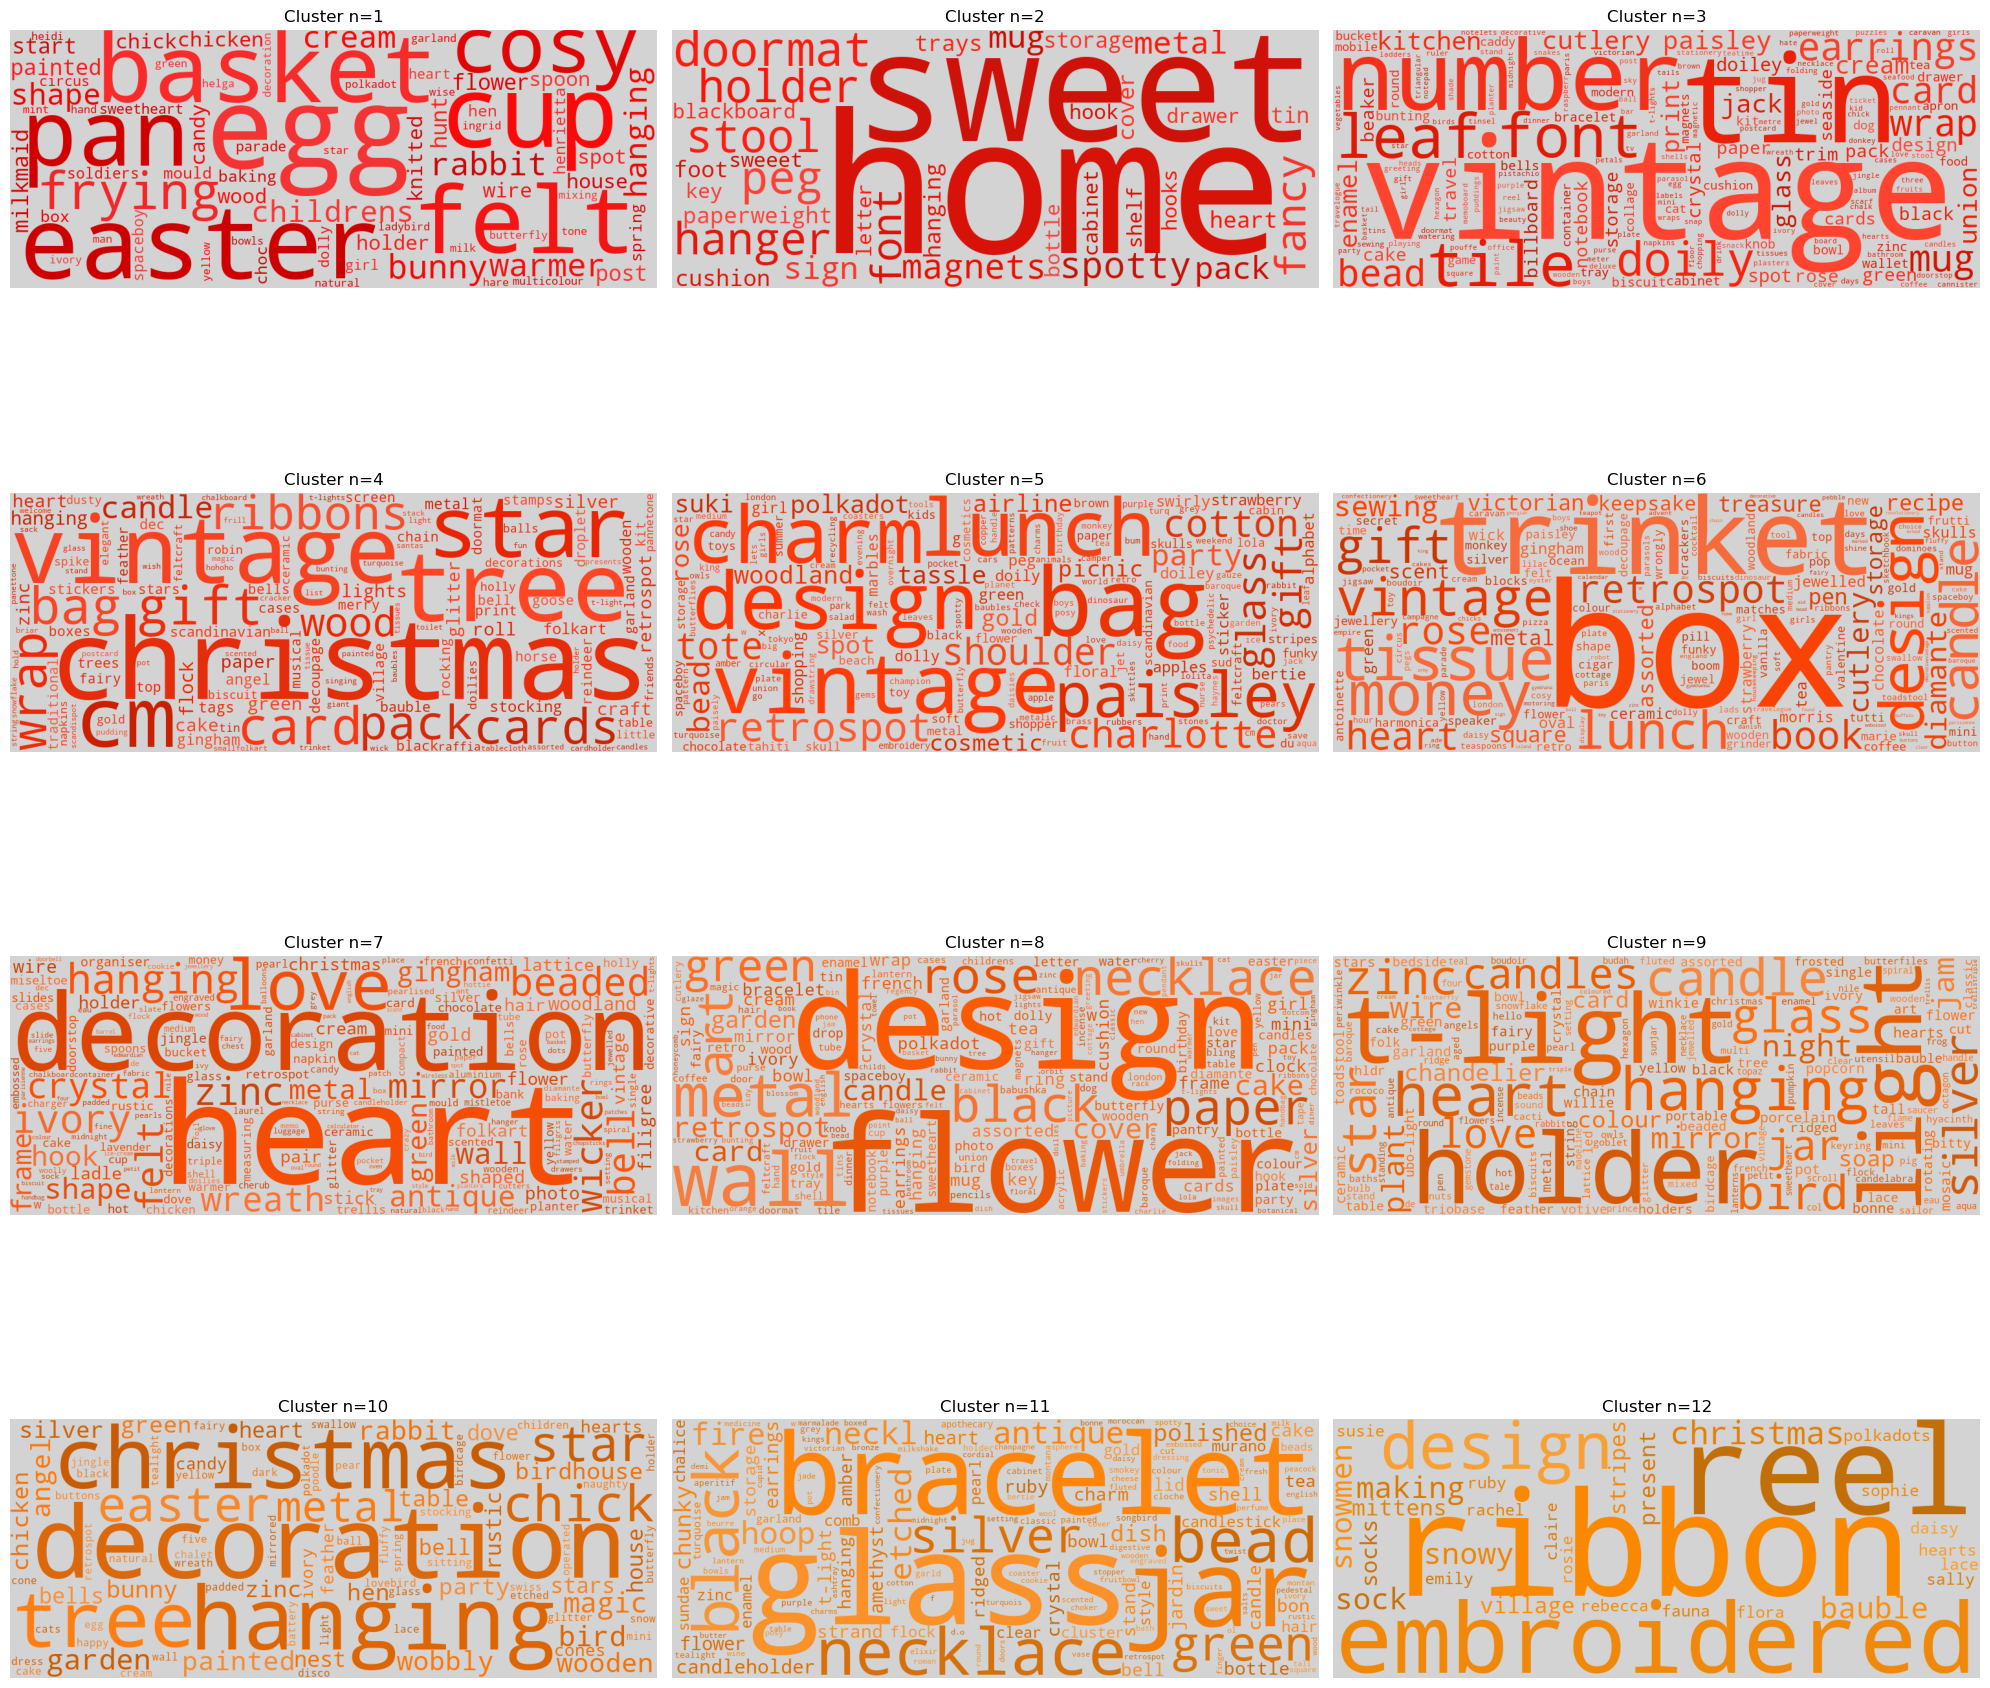

In [60]:
best_no_of_cluster = 12

# Assuming data_desc_doc and df_desc are already defined
kmeans = KMeans(n_clusters=best_no_of_cluster, n_init=20, random_state=0)
kmeans.fit(data_desc_doc)
km_result = kmeans.predict(data_desc_doc)
df_desc['cluster_group'] = pd.Series(km_result)

def desinate_color(word=None, position=None, orientation=None, font_size=None, font_path=None, random_state=0):
    h = randint(rand_tone * 3, rand_tone * 3)
    s = randint(90, 100)
    l = randint(40, 60)
    return "hsl({}, {}%, {}%)".format(h, s, l)

fig = plt.figure(1, figsize=(20, 20))
for a in range(best_no_of_cluster):
    df_temp = df_desc[df_desc['cluster_group'] == a]
    
    c = Counter()
    rand_tone = a
    for i, row in df_temp.iterrows():
        c.update(row['token_list'])
    
    # Get top words for each cluster
    top_words = c.most_common(10)  # Change the number to get more or fewer words
    
    # Print top words for each cluster
    print(f"Cluster {a + 1} Top Words:")
    for word, freq in top_words:
        print(f"{word}: {freq}")
    
    # Generate word clouds
    wordcloud = WordCloud(width=1000, height=400, background_color='lightgrey', color_func=desinate_color,
                          relative_scaling=0.15, random_state=0)
    wordcloud.generate_from_frequencies(c)
    axis_1 = fig.add_subplot(4, 3, (a + 1))
    axis_1.imshow(wordcloud)
    axis_1.axis('off')
    plt.title(f'Cluster n={a + 1}')

plt.tight_layout()
plt.show()


In [61]:
# Create a dictionary to map Description to cluster_group
desc_cluster_dict = df_desc.set_index('Description')['cluster_group'].to_dict()

# Define a function to map the descriptions to their respective clusters
def assign_category(desc):
    return desc_cluster_dict.get(desc, "Other")

# Apply the function to the 'Description' column in the original DataFrame
df['Category'] = df['Description'].apply(assign_category)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  Category  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom         8  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom         7  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom         7  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom         7  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom         6  
...                 ...        ...         ...             ...       ...  
541904  12/9/2011 12:50       0.85     12680.0          France         7  
541905  12/9/2011 12:50       2.10     12680.0          France         7  
541906  12/9/2011 12:50       4.15     12680.0          France         7  
541907  12/9/2011 12:50       4.15     12680.0          France         7  
541908  12/9/2011 12:50       4.95     12680.0          France         7  

[540455 rows x 9 columns]

In [62]:
# Create a dictionary to map cluster numbers to category names
category_dict = {
    1: "Easter Decorations",
    2: "Home Essentials",
    3: "Vintage Collectibles",
    4: "Christmas Specials",
    5: "Bags & Accessories",
    6: "Boxes & Organizers",
    7: "Heartfelt Gifts",
    8: "Art & Craft Supplies",
    9: "Lighting & Candles",
    10: "Seasonal Decorations",
    11: "Glassware & Jewelry",
    12: "Ribbons & Embroidery"
}

# Replace the numbers in the 'Category' column with the category names
df['Category'] = df['Category'].map(category_dict)


In [63]:
category_counts = df['Category'].value_counts()
category_counts

Heartfelt Gifts         344696
Christmas Specials       50223
Boxes & Organizers       31545
Bags & Accessories       24135
Vintage Collectibles     22635
Art & Craft Supplies     19222
Home Essentials          18979
Seasonal Decorations      9293
Lighting & Candles        8124
Easter Decorations        3978
Glassware & Jewelry       3107
Name: Category, dtype: int64

In [64]:
total_quantity_per_category = df.groupby('Category')['Quantity'].sum()
total_quantity_per_category

Category
Art & Craft Supplies     309423
Bags & Accessories       210554
Boxes & Organizers       293169
Christmas Specials       570259
Easter Decorations        22116
Glassware & Jewelry       19068
Heartfelt Gifts         3068438
Home Essentials          188100
Lighting & Candles        93609
Seasonal Decorations     103088
Vintage Collectibles     274103
Name: Quantity, dtype: int64

In [65]:
# Top 10 most frequently purchased products
top_10_products = df['Description'].value_counts().head(10)
print("Top 10 most frequently purchased products:")
print(top_10_products)

Top 10 most frequently purchased products:
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64


In [66]:
# Average price of products in the dataset
average_price = df['UnitPrice'].mean()
print("\nAverage price of products in the dataset: ${:.2f}".format(average_price))


Average price of products in the dataset: $4.62


In [67]:
# Product category generating the highest revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
print("\nProduct category generating the highest revenue:")
print(category_revenue.head(1))


Product category generating the highest revenue:
Category
Heartfelt Gifts    6041385.674
Name: Revenue, dtype: float64


In [68]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  \
0        12/1/2010 8:26       2.55     17850.0  United Kingdom   
1        12/1/2010 8:26       3.39     17850.0  United Kingdom   
2        12/1/2010 8:26       2.75     17850.0  United Kingdom   
3        12/1/2010 8:26       3.39     17850.0  United Kingdom   
4        12/1/2010 8:26       3.39     17850.0  United Kingdom   
...                 ...        ...         ...             ...   
541904  12/9/2011 12:50       0.85     12680.0          France   
541905  12/9/2011 12:50       2.10     12680.0          France   
541906  12/9/2011 12:50       4.15     12680.0          France   
541907  12/9/2011 12:50       4.15     12680.0          France   
541908  12/9/2011 12:50       4.95     12680.0          France   

                    Category  Revenue  
0       Art & Craft Supplies    15.30  
1            Heartfelt Gifts    20.34  
2            Heartfelt Gifts    22.00  
3            Heartfelt Gifts    20.34  
4         Boxes & Organizers    20.34  
...                      ...      ...  
541904       Heartfelt Gifts    10.20  
541905       Heartfelt Gifts    12.60  
541906       Heartfelt Gifts    16.60  
541907       Heartfelt Gifts    16.60  
541908       Heartfelt Gifts    14.85  

[540455 rows x 10 columns]

# Q4 Time Analysis
o Is there a specific day of the week or time of day when most orders are placed?
o What is the average order processing time?
o Are there any seasonal trends in the dataset?

In [69]:
import pandas as pd
df_time=df

df_time['InvoiceDate'] = pd.to_datetime(df_time['InvoiceDate'])

# Extract day of the week and hour of the day
df_time['Day_of_Week'] = df_time['InvoiceDate'].dt.day_name()
df_time['Hour_of_Day'] = df_time['InvoiceDate'].dt.hour

# Find the most common day of the week and hour of the day
most_common_day = df_time['Day_of_Week'].mode()[0]
most_common_hour = df_time['Hour_of_Day'].mode()[0]

print(f"Most Common Day of the Week: {most_common_day}")
print(f"Most Common Hour of the Day: {int(most_common_hour)}")

Most Common Day of the Week: Thursday
Most Common Hour of the Day: 12


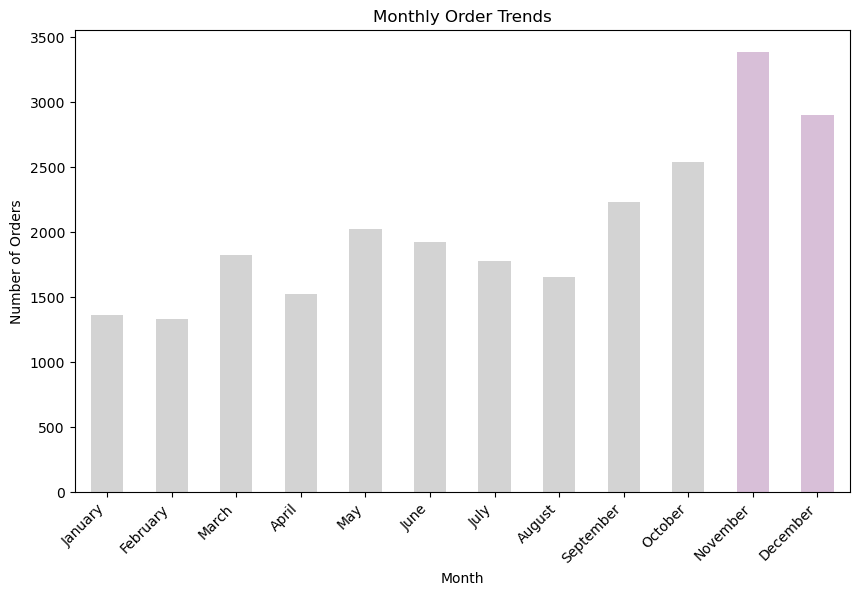

In [70]:
# import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset has 'Date_of_Purchase' column
df_time['Month'] = df_time['InvoiceDate'].dt.month

# Calculate the total orders per month
monthly_orders = df_time.groupby('Month')['InvoiceNo'].nunique()

# Map month numbers to names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_orders.index = monthly_orders.index.map({i + 1: month for i, month in enumerate(month_names)})

# Plot the seasonal trends
pastel_colors = plt.cm.Pastel1(np.linspace(0, 1, len(monthly_orders)))
colors = ['lightgray'] * (len(monthly_orders) - 2) + ['thistle', 'thistle']
plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='bar', color=colors)
plt.title('Monthly Order Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate tick labels for better visibility
plt.show()

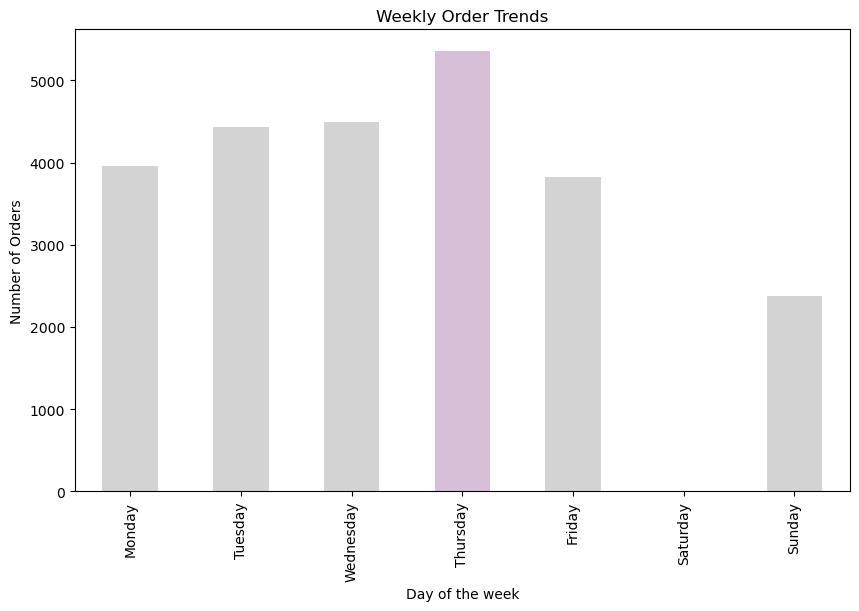

In [71]:
# Plot the seasonal trends
import matplotlib.pyplot as plt
import calendar
days_of_week_order = list(calendar.day_name)
df_time['Day_of_Week'] = pd.Categorical(df_time['Day_of_Week'], categories=days_of_week_order, ordered=True)
# Calculate the total orders per month
weekly_orders = df_time.groupby('Day_of_Week')['InvoiceNo'].nunique()
plt.figure(figsize=(10, 6))
colors = ['lightgray'] * 3 + ['thistle']+ ['lightgray'] * 3
weekly_orders.plot(kind='bar', color=colors)
plt.title('Weekly Order Trends')
plt.xlabel('Day of the week')
plt.ylabel('Number of Orders')
plt.show()

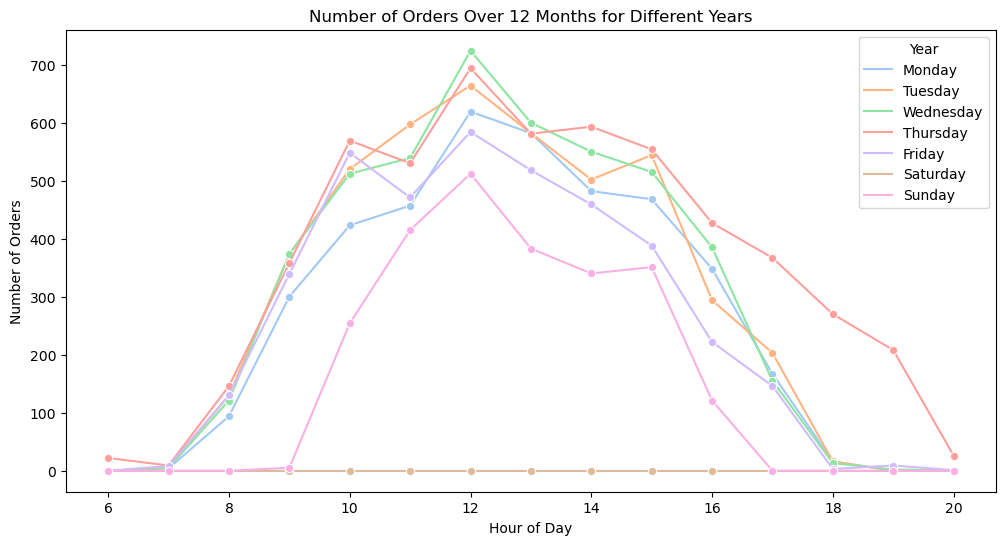

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Group by year and month and count the number of orders
orders_by_month = df_time.groupby(['Day_of_Week', 'Hour_of_Day'])['InvoiceNo'].nunique().reset_index()

# Rename the columns for clarity
orders_by_month.columns = ['Day_of_Week', 'Hour_of_Day', 'Number_of_Orders']

# Plot the line chart
plt.figure(figsize=(12, 6))
#,palette=['red','green','blue','orange','purple','black','brown']
sns.lineplot(x='Hour_of_Day', y='Number_of_Orders', hue='Day_of_Week',palette='pastel', data=orders_by_month, marker='o')
plt.title('Number of Orders Over 12 Months for Different Years')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend(title='Year', loc='upper right')
plt.show()

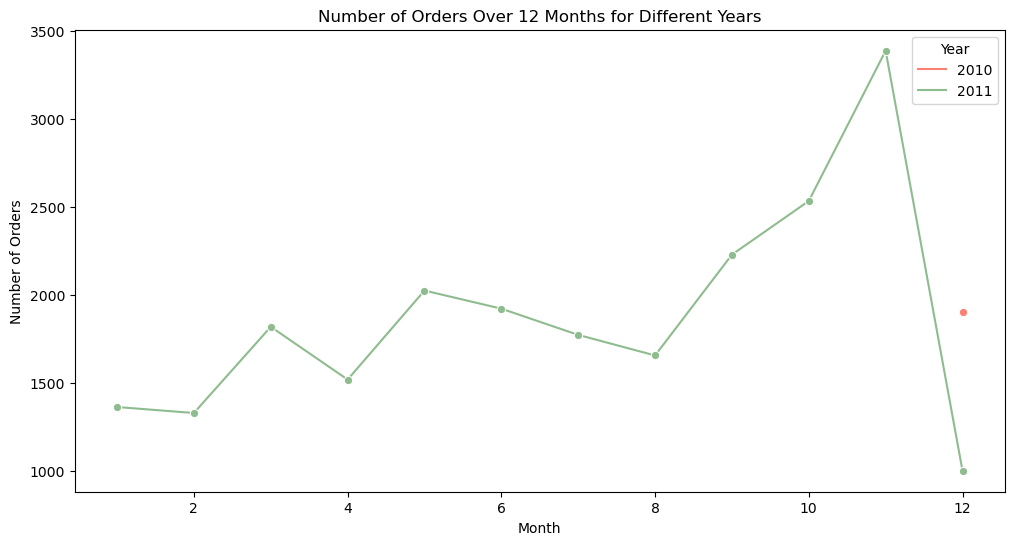

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

year_wise=df
year_wise.head()
# Assuming 'df' is your DataFrame with a 'Date_of_Purchase' column
#year_wise['Date_of_Purchase'] = pd.to_datetime(year_wise['Date_of_Purchase'])

# Extract the year and month from the date
year_wise['Year'] = year_wise['InvoiceDate'].dt.year
year_wise['Month'] = year_wise['InvoiceDate'].dt.month

# Group by year and month and count the number of orders
orders_by_month = year_wise.groupby(['Year', 'Month'])['InvoiceNo'].nunique().reset_index()

# Rename the columns for clarity
orders_by_month.columns = ['Year', 'Month', 'Number_of_Orders']

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Number_of_Orders', hue='Year', data=orders_by_month, marker='o',palette=['salmon','darkseagreen'])
plt.title('Number of Orders Over 12 Months for Different Years')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Year', loc='upper right')
#plt.xticks(rotation=45, ha='right') 
plt.show()

In [74]:
df_date = pd.read_excel('data_clean.xlsx')
df_date.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate    EndDate          CompletionDate  UnitPrice  \
0 2010-12-01 08:26:00 2011-01-01 2010-12-25 11:31:55.200       2.55   
1 2010-12-01 08:26:00 2011-01-01 2010-12-07 11:02:49.920       3.39   
2 2010-12-01 08:26:00 2011-01-01 2010-12-03 08:46:19.200       2.75   
3 2010-12-01 08:26:00 2011-01-01 2010-12-20 15:30:23.040       3.39   
4 2010-12-01 08:26:00 2011-01-01 2010-12-18 09:25:20.640       3.39   
5 2010-12-01 08:26:00 2011-01-01 2011-01-01 14:21:15.840       7.65   
6 2010-12-01 08:26:00 2011-01-01 2010-12-17 15:41:36.960       4.25   
7 2010-12-01 08:28:00 2011-01-01 2010-12-07 10:49:52.320       1.85   
8 2010-12-01 08:28:00 2011-01-01 2010-12-25 08:53:13.920       1.85   
9 2010-12-01 08:34:00 2011-01-01 2010-12-28 10:26:06.720       1.69   

   CustomerID         Country  
0       17850  United Kingdom  
1       17850  United Kingdom  
2       17850  United Kingdom  
3       17850  United Kingdom  
4       17850  United Kingdom  
5       17850  United Kingdom  
6       17850  United Kingdom  
7       17850  United Kingdom  
8       17850  United Kingdom  
9       13047  United Kingdom

In [75]:
df_date['Processing_Time'] = df_date['CompletionDate'] - df_date['InvoiceDate']
average_processing_time = df_date['Processing_Time'].mean()
average_processing_time_days = df_date['Processing_Time'].mean().days
average_processing_time_hours = df_date['Processing_Time'].mean().seconds // 3600

# Print the result
print(f"Average Order Processing Time: {average_processing_time_days} days and {average_processing_time_hours} hours")
print(f"Average Order Processing Time: {average_processing_time.total_seconds() / 3600} hours")

Average Order Processing Time: 15 days and 17 hours
Average Order Processing Time: 377.22375878638894 hours


# Q5 Geographical Analysis
o Can you determine the top 5 countries with the highest number of orders?
o Is there a correlation between the country of the customer and the average order
value?

In [76]:
#Finding total number of orders made
order_counts = df.groupby(['CustomerID', 'InvoiceNo', 'Country']).size().reset_index(name='item_count_per_order')
order_counts.head()

CustomerID InvoiceNo         Country  item_count_per_order
0     12346.0    541431  United Kingdom                     1
1     12346.0   C541433  United Kingdom                     1
2     12347.0    537626         Iceland                    31
3     12347.0    542237         Iceland                    29
4     12347.0    549222         Iceland                    24

In [77]:
#Finding the top 5 countries with the highest number of orders
top5_countries = order_counts['Country'].value_counts().head(5).index.tolist()
top5_countries

['United Kingdom', 'Germany', 'France', 'EIRE', 'Belgium']

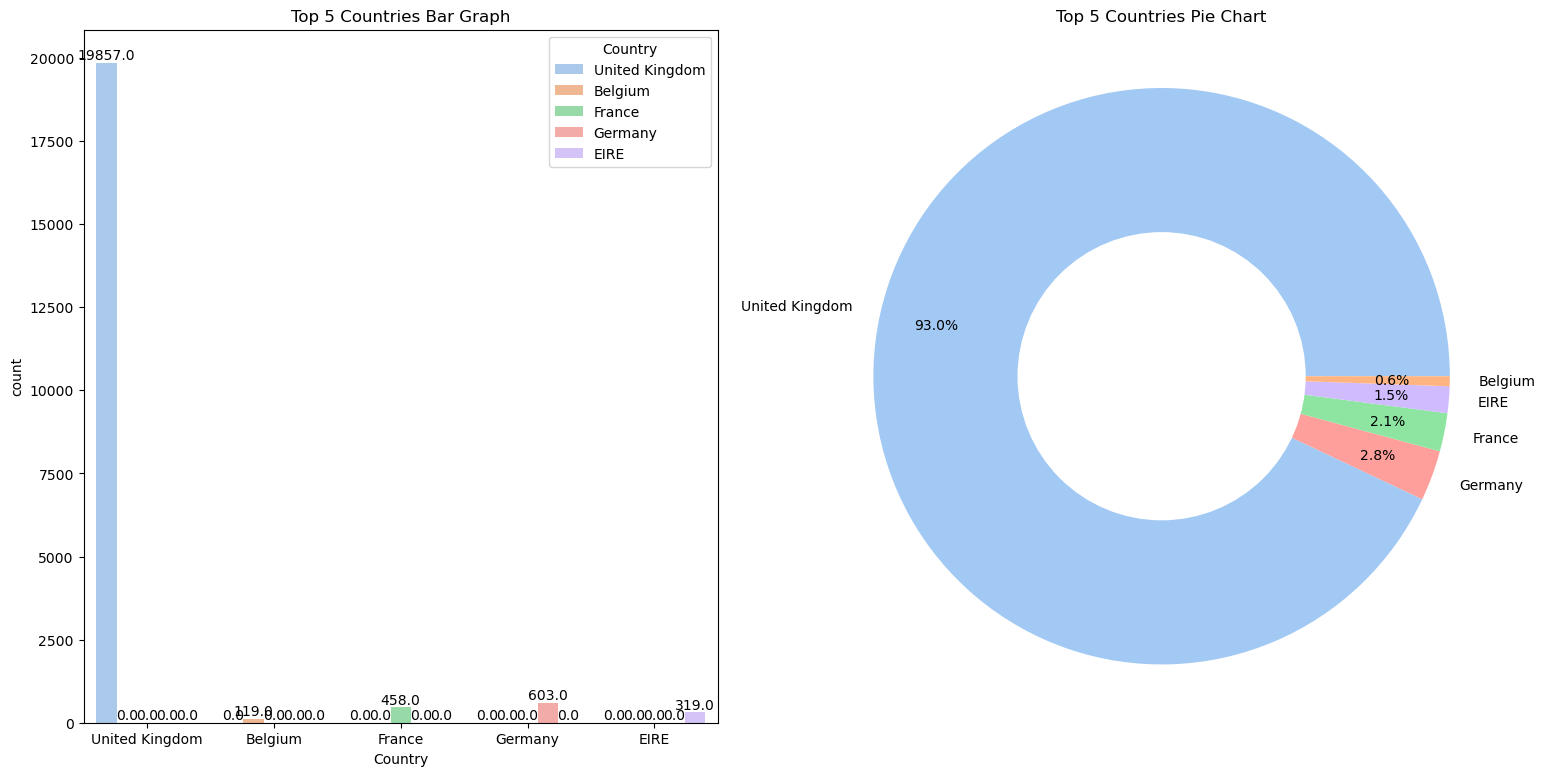

In [78]:
#Data frame containing only the top 5 countries 
top5_df = order_counts[order_counts['Country'].isin(top5_countries)]

# Calculate the value counts for the 'Country' column for the top 5 countries
top5_series = top5_df['Country'].value_counts()

# Defining a color palette to ensure uniformity between both the graphs.
palette = sns.color_palette("pastel", n_colors=len(top5_df['Country'].unique()))

# Create a color mapping for countries
color_mapping = {country: color for country, color in zip(top5_df['Country'].unique(), palette)}


# Create a figure and define the layout to plot count plot and pie chart
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# Generate a count plot
sns.countplot(x="Country", data=top5_df, ax=axes[0], palette=color_mapping, hue="Country")

# Add value annotations to each bar
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{height}', 
                     (bar.get_x() + bar.get_width() / 2, height), 
                     ha='center', va='bottom')

# Use the same color mapping for the pie chart
colors = [color_mapping[country] for country in top5_series.index]

# Plotting the pie chart
top5_series.plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=0, pctdistance=0.8, colors=colors)

# Draw a circle at the center of the pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.50,fc='white')
axes[1].add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].axis('equal')  

# Setting titles
axes[0].set_title('Top 5 Countries Bar Graph')
axes[1].set_title('Top 5 Countries Pie Chart')

# Hide the y-axis label for the pie chart
axes[1].set_ylabel('')

# Show plot
plt.show()

In [79]:
#Finding the top 5 countries excluding UK
top6_countries = order_counts['Country'].value_counts().head(6).index.tolist()
top_6_excluding_first = top6_countries[1:7]
top_6_excluding_first

['Germany', 'France', 'EIRE', 'Belgium', 'Spain']

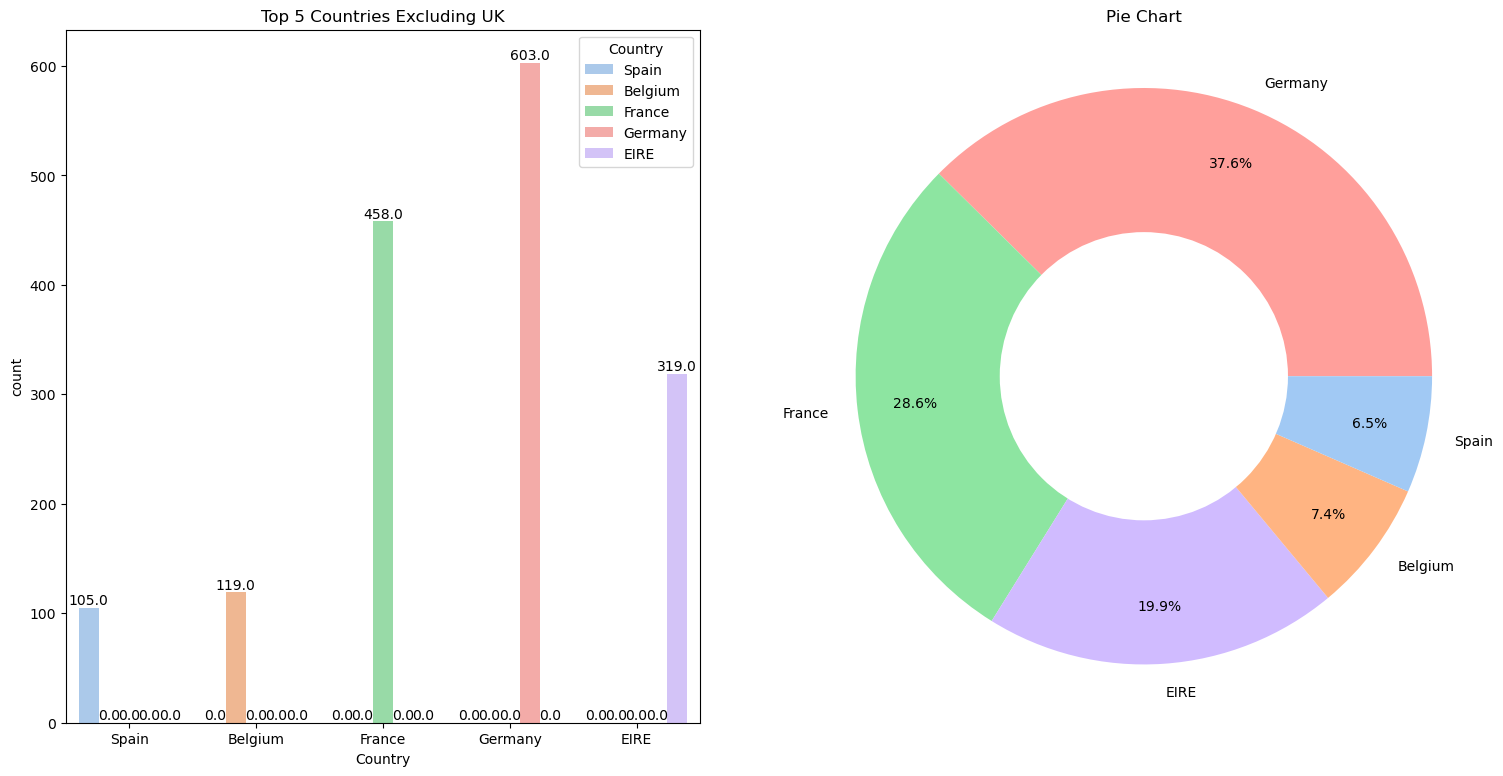

In [80]:
#Data frame containing only the top 5 countries excluding UK
top_6_excluding_first_df = order_counts[order_counts['Country'].isin(top_6_excluding_first)]

# Calculate the value counts for the 'Country' column for the top 5 countries
top5_series_exceptUK = top_6_excluding_first_df['Country'].value_counts()

# Defining a color palette to ensure uniformity between both the graphs.
palette = sns.color_palette("pastel", n_colors=len(top_6_excluding_first_df['Country'].unique()))

# Create a color mapping for countries
color_mapping = {country: color for country, color in zip(top_6_excluding_first_df['Country'].unique(), palette)}


# Create a figure and define the layout
fig, axes = plt.subplots(1, 2, figsize=(18, 9))  # 1 row, 2 columns

# Generate a count plot (Bar Chart)
sns.countplot(x="Country", data=top_6_excluding_first_df, ax=axes[0], palette=color_mapping, hue="Country")

# Add value annotations to each bar
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{height}', 
                     (bar.get_x() + bar.get_width() / 2, height), 
                     ha='center', va='bottom')

# Use the same color mapping for the pie chart
colors = [color_mapping[country] for country in top5_series_exceptUK.index]

# Plotting the pie chart
top5_series_exceptUK.plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=0, pctdistance=0.8, colors=colors)

# Draw a circle at the center of the pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.50,fc='white')
axes[1].add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].axis('equal')  

# Setting titles
axes[0].set_title('Top 5 Countries Excluding UK')
axes[1].set_title('Pie Chart')

# Hide the y-axis label for the pie chart
axes[1].set_ylabel('')

# Show plot
plt.show()

In [81]:
#Group data by Customer ID and their Country
customer_counts = df.groupby(['CustomerID', 'Country']).size().reset_index()

#Finding number of customers per country
cust_per_country = customer_counts['Country'].value_counts().reset_index()

#Creating a data frame with Country and Customer Count
cust_per_country_df = pd.DataFrame(cust_per_country)

#Renaming the columns for readability
cust_per_country_df.columns = ['Country', 'Customer_count']

#Calculate average order value
df['total price'] = df['Quantity'] * df ['UnitPrice']
order_value = df.groupby(['InvoiceNo','Country'])['total price'].sum().reset_index()
average_order_value = order_value.groupby('Country')['total price'].mean().reset_index(name='average_order_value')

#Merging both the data frames to find if there is a correlation
merged_df = pd.merge(average_order_value, cust_per_country_df, how = 'outer', indicator = True)
merged_df.head()

Country  average_order_value  Customer_count _merge
0  Australia          1986.627101             9.0   both
1    Austria           534.437895            11.0   both
2    Bahrain           137.100000             2.0   both
3    Belgium           343.789580            25.0   both
4     Brazil          1143.600000             1.0   both

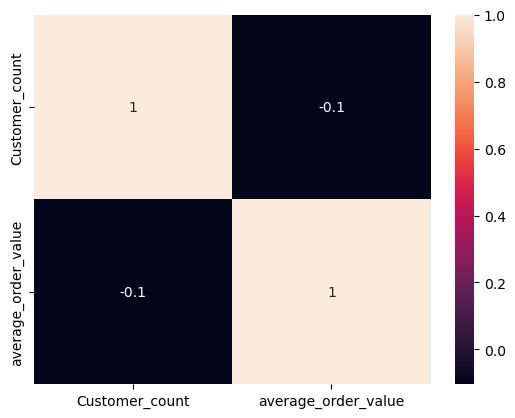

In [82]:
# Correlation matrix to understand the relationship
corr_matrix = merged_df[['Customer_count', 'average_order_value']].astype(float).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [83]:
import geopandas as gpd
import pandas as pd
import plotly.express as px

# Load a world map shapefile or GeoJSON
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming 'merged_df' is your DataFrame with 'Country', 'average_order_value', and 'customer_count'
# Merge the DataFrame with the world GeoDataFrame
world_merged = world.merge(merged_df, how='left', left_on='name', right_on='Country')

# Create an interactive choropleth map using plotly
fig = px.choropleth(world_merged, 
                    locations='iso_a3',  # ISO 3166-1 alpha-3 country codes
                    color='average_order_value',
                    hover_name='name',  # Tooltip displays country name
                    color_continuous_scale='Greens',
                    title='World Map with Average Order Value by Country')

# Show the map
fig.show()

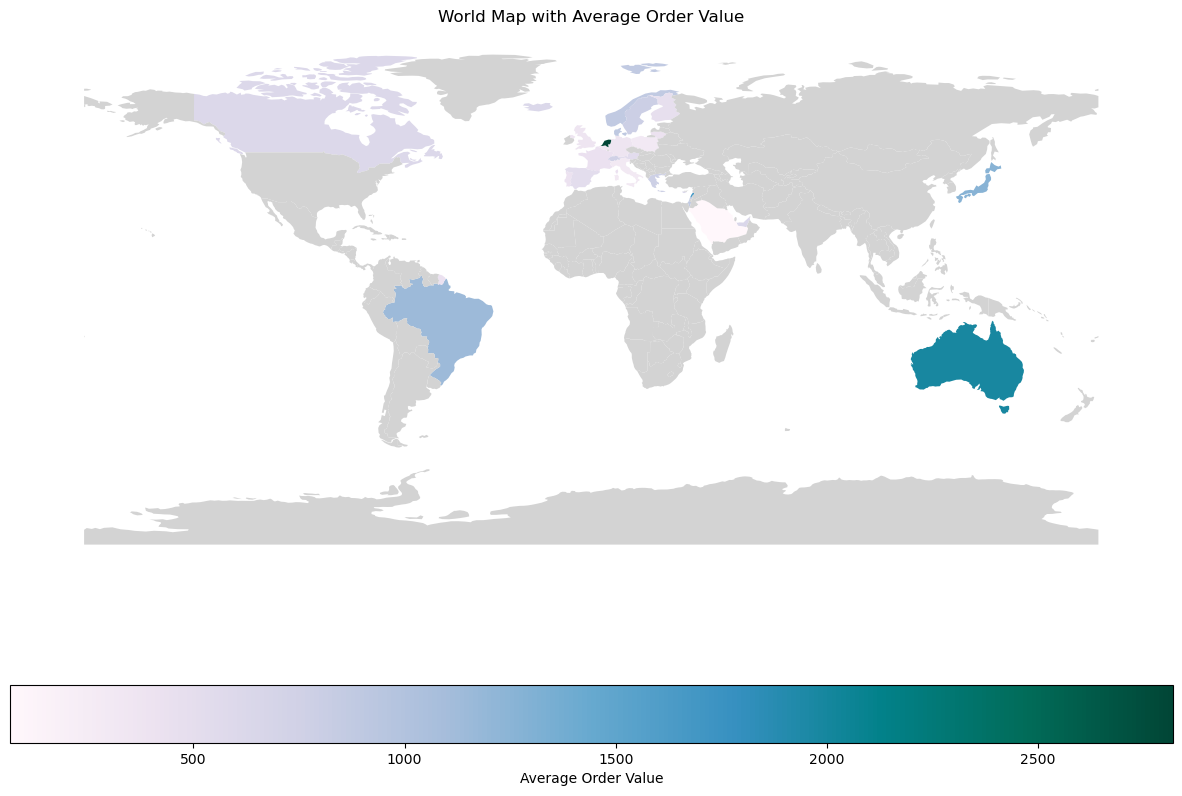

In [84]:
# Importing necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load a world map shapefile or GeoJSON. GeoPandas comes with built-in datasets you can use for this purpose.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the 'merged_df' DataFrame with the world GeoDataFrame
# Ensure the country names in your DataFrame match the world GeoDataFrame.
world_merged = world.merge(merged_df, how='left', left_on='name', right_on='Country')

# Plot the world map with customer count and average order value
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Use the 'customer_count' to determine the size of each country on the map
world_merged.plot(column='average_order_value', ax=ax, legend=True,
                  legend_kwds={'label': "Average Order Value", 'orientation': "horizontal"},
                  cmap='PuBuGn', missing_kwds={"color": "lightgrey"})

# Remove the axis
ax.set_axis_off()

# Set a title
plt.title('World Map with Average Order Value')

# Show the plot
plt.show()


# Q6 Payment Analysis
o What are the most common payment methods used by customers?
o Is there a relationship between the payment method and the order amount?

In [85]:
import pandas as pd
import numpy as np

# Set a seed for the random number generator for reproducibility
np.random.seed(0)

# Assume 'df' is your existing DataFrame
# Define a list of payment methods
payment_methods = ['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer', 'Cash on Delivery', 'ApplePay', 'GiftCard']

# Assign random payment methods to a new column with the seed set
order_value['Payment_Method'] = np.random.choice(payment_methods, size=len(order_value))

# Now 'df' will include the new 'Payment_Method' column with the fixed random values
print(order_value.head())

  InvoiceNo         Country  total price    Payment_Method
0    536365  United Kingdom       139.12  Cash on Delivery
1    536366  United Kingdom        22.20          ApplePay
2    536367  United Kingdom       278.73       Credit Card
3    536368  United Kingdom        70.05     Bank Transfer
4    536369  United Kingdom        17.85     Bank Transfer


In [86]:
payment_method_counts = order_value['Payment_Method'].value_counts()

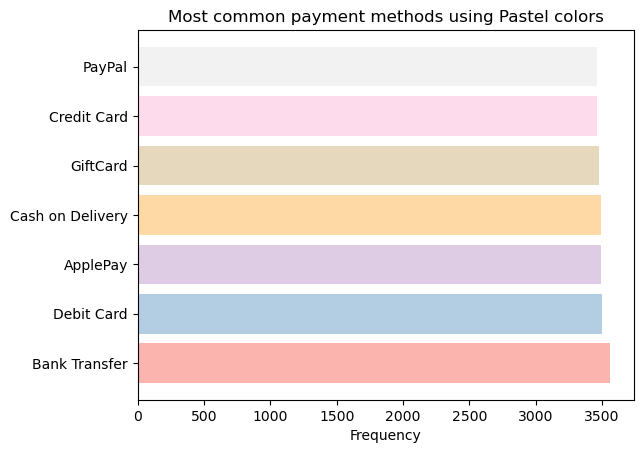

In [87]:
from matplotlib import colormaps

# Get the 'Pastel1' colormap using the new approach
pastel_colors = colormaps['Pastel1'](np.linspace(0, 1, len(payment_methods)))

# Now we plot with the pastel colors.
fig, ax = plt.subplots()

# We use the colors from the colormap by providing the indices 0 to num_colors
ax.barh(payment_method_counts.index, payment_method_counts.values, align='center', color=pastel_colors)
ax.set_xlabel('Frequency')
ax.set_title('Most common payment methods using Pastel colors')

plt.show()


In [118]:
#Performing ANOVA test to check correlation
import scipy.stats as stats

# Perform ANOVA using scipy's f_oneway function
anova_results = stats.f_oneway(*[group['total price'].values for name, group in order_value.groupby('Payment_Method')])

print(f"ANOVA F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}")

ANOVA F-statistic: 0.7646143847400595, p-value: 0.5976794980456945


# Q7 #THIS HAS BEEN ANSWERED IN THE RFM SECTION

# Q8 Returns and Refunds
o What is the percentage of orders that have experienced returns or refunds?
o Is there a correlation between the product category and the likelihood of returns?

In [89]:
# Calculate the percentage of orders that have experienced returns or refunds
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["InvoiceNo"] = df["InvoiceNo"].astype(str)

returns_or_refunds = df[df["Quantity"] < 0]["InvoiceNo"].nunique()
total_orders = df["InvoiceNo"].nunique()
percentage = (returns_or_refunds / total_orders) * 100
print("\n------------------------------------------------------------------------\n")

bold_text = "\033[1mThe percentage of orders that have experienced returns or refunds is {percentage:.2f}%.\033[0m"

print(bold_text.format(percentage=percentage))

print("\n------------------------------------------------------------------------\n")


------------------------------------------------------------------------

The percentage of orders that have experienced returns or refunds is 17.63%.

------------------------------------------------------------------------



In [90]:
print("Total quantity of products for each category:\n\n", total_quantity_per_category.sort_values(ascending=False))

Total quantity of products for each category:

 Category
Heartfelt Gifts         3068438
Christmas Specials       570259
Art & Craft Supplies     309423
Boxes & Organizers       293169
Vintage Collectibles     274103
Bags & Accessories       210554
Home Essentials          188100
Seasonal Decorations     103088
Lighting & Candles        93609
Easter Decorations        22116
Glassware & Jewelry       19068
Name: Quantity, dtype: int64


In [91]:
# Check if there is a correlation between the product category and the likelihood of returns
df["returns"] = df.apply(lambda row: "No.of Returns" if row["Quantity"] < 0 and row["InvoiceNo"].startswith("C") else None, axis=1)
correlation = df.groupby("Category")["returns"].value_counts().unstack().fillna(0)
print("Number of returns per category:\n\n", correlation)


Number of returns per category:

 returns               No.of Returns
Category                           
Art & Craft Supplies            481
Bags & Accessories              544
Boxes & Organizers              344
Christmas Specials              674
Easter Decorations               70
Glassware & Jewelry              18
Heartfelt Gifts                6126
Home Essentials                 298
Lighting & Candles               60
Seasonal Decorations            344
Vintage Collectibles            276


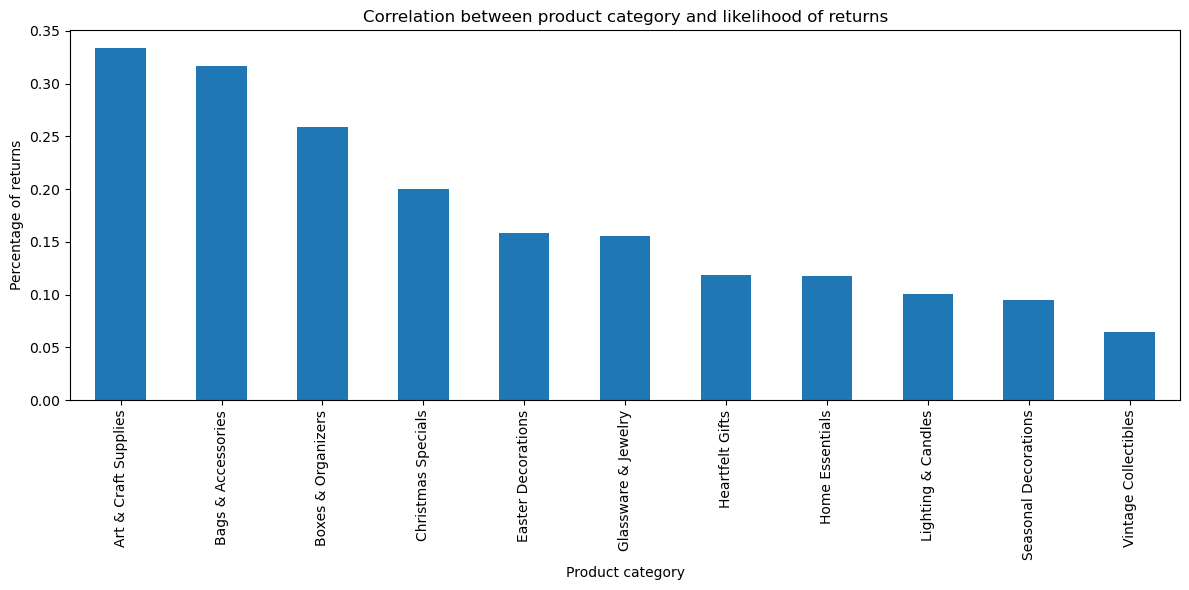

In [92]:
df["returns"] = df.apply(lambda row: "No.of Returns" if row["Quantity"] < 0 and row["InvoiceNo"].startswith("C") else None, axis=1)

# Count returns per category
returns_by_category = df[df["returns"] == "No.of Returns"].groupby("Category")["returns"].count()

# Calculate total quantity per category
total_quantity_per_category = df.groupby("Category")["Quantity"].sum()

# Calculate the percentage of returns based on total quantity
returns_percentage = returns_by_category / total_quantity_per_category * 100

# Plotting the percentage of returns per category
plt.figure(figsize=(12, 6))
returns_percentage.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation between product category and likelihood of returns')
plt.xlabel('Product category')
plt.ylabel('Percentage of returns')
plt.xticks(range(len(returns_percentage.index)), returns_percentage.index, rotation=90)
plt.tight_layout()
plt.show()


In [93]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France   
541905 2011-12-09 12:50:00       2.10     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.15     12680.0          France   
541908 2011-12-09 12:50:00       4.95     12680.0          France   

                    Category  Revenue Day_of_Week  Hour_of_Day  Month  Year  \
0       Art & Craft Supplies    15.30   Wednesday            8     12  2010   
1            Heartfelt Gifts    20.34   Wednesday            8     12  2010   
2            Heartfelt Gifts    22.00   Wednesday            8     12  2010   
3            Heartfelt Gifts    20.34   Wednesday            8     12  2010   
4         Boxes & Organizers    20.34   Wednesday            8     12  2010   
...                      ...      ...         ...          ...    ...   ...   
541904       Heartfelt Gifts    10.20      Friday           12     12  2011   
541905       Heartfelt Gifts    12.60      Friday           12     12  2011   
541906       Heartfelt Gifts    16.60      Friday           12     12  2011   
541907       Heartfelt Gifts    16.60      Friday           12     12  2011   
541908       Heartfelt Gifts    14.85      Friday           12     12  2011   

        total price returns  
0             15.30    None  
1             20.34    None  
2             22.00    None  
3             20.34    None  
4             20.34    None  
...             ...     ...  
541904        10.20    None  
541905        12.60    None  
541906        16.60    None  
541907        16.60    None  
541908        14.85    None  

[540455 rows x 16 columns]

# Q9 Profitability Analysis
o Can you calculate the total profit generated by the company during the dataset's
time period?
o What are the top 5 products with the highest profit margins?

In [94]:
df = pd.read_csv('data_proj2.csv', encoding='ISO-8859-1')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CostPrice  Profit  CustomerID  \
0        12/1/2010 8:26       2.55       1.89    0.66     17850.0   
1        12/1/2010 8:26       3.39       2.71    0.68     17850.0   
2        12/1/2010 8:26       2.75       1.80    0.95     17850.0   
3        12/1/2010 8:26       3.39       2.60    0.79     17850.0   
4        12/1/2010 8:26       3.39       2.49    0.90     17850.0   
...                 ...        ...        ...     ...         ...   
541904  12/9/2011 12:50       0.85       0.43    0.42     12680.0   
541905  12/9/2011 12:50       2.10       1.60    0.50     12680.0   
541906  12/9/2011 12:50       4.15       2.57    1.58     12680.0   
541907  12/9/2011 12:50       4.15       2.89    1.26     12680.0   
541908  12/9/2011 12:50       4.95       2.54    2.41     12680.0   

               Country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
541904          France  
541905          France  
541906          France  
541907          France  
541908          France  

[541909 rows x 10 columns]

In [95]:
total_profit = df['Profit'].sum()

# Round total profit to 2 decimal places
total_profit_rounded = round(total_profit, 2)

bold_text = "\033[1m"
reset_text = "\033[0m"

print(f" {bold_text} Total profit generated by the company: ${total_profit_rounded}{reset_text}")


  Total profit generated by the company: $876543.39


In [96]:
# Calculate the total revenue and total profit for each product
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
df['TotalProfit'] = df['TotalRevenue'] - (df['Quantity'] * df['CostPrice'])  
# Filter rows where Quantity is greater than 0
df_filtered = df[df['Quantity'] > 0]

# Group by Description and calculate total revenue and total profit for filtered data
grouped = df_filtered.groupby('Description').agg({'TotalRevenue': 'sum', 'TotalProfit': 'sum'}).reset_index()

# Calculate profit margin
grouped['ProfitMargin'] = (grouped['TotalProfit'] / grouped['TotalRevenue']) * 100
grouped['ProfitMargin'] = grouped['ProfitMargin'].round(2)  # Round profit margin to 2 decimal places

# Exclude rows where profit margin is 100
grouped = grouped[grouped['ProfitMargin'] != 100]

# Sort by profit margin in descending order and get the top 5
top_5_profit_margin = grouped.sort_values(by='ProfitMargin', ascending=False).head(20)

print(top_5_profit_margin[['Description', 'ProfitMargin']])

                              Description  ProfitMargin
2985              RUBY GLASS NECKLACE 42"         50.00
1906          LARGE HEART FLOWERS HOOK            50.00
2510       PINK BERTIE MOBILE PHONE CHARM         49.40
115       72 CAKE CASES VINTAGE CHRISTMAS         49.09
2657         PINK/WHITE GLASS DEMI CHOKER         48.93
218                ASS COL CIRCLE MOBILE          48.84
1093       DUSTY PINK CHRISTMAS TREE 30CM         48.80
347                  BIRTHDAY BANNER TAPE         48.80
2275           ORANGE FELT VASE + FLOWERS         48.80
3071  SET 10 MINICARDS CUTE SNOWMAN 17071         48.80
1175           ENAMEL DINNER PLATE PANTRY         48.48
907        CROCHET LILAC/RED BEAR KEYRING         48.48
2939                    ROCOCO WALL MIROR         48.32
1564         GREEN PENDANT SHELL NECKLACE         48.13
2264                OCEAN STRIPE HAMMOCK          48.05
2359         PAINT YOUR OWN EGGS IN CRATE         47.89
3309               SILICON CUBE 25W, BLUE       

# Q10 Customer Satisfaction
o Is there any data available on customer feedback or ratings for products or services?
o Can you analyze the sentiment or feedback trends, if available?

In [97]:
distinct_values_count = df.groupby(['Description', 'CustomerID']).size().reset_index(name='Count')
distinct_values_count = distinct_values_count.sort_values(by='Count', ascending=False)
distinct_values_count

Description  CustomerID  Count
36829                           CARRIAGE     14911.0     85
44321                      CHILLI LIGHTS     17841.0     65
186464          REGENCY CAKESTAND 3 TIER     14911.0     56
150004    PACK OF 60 DINOSAUR CAKE CASES     17841.0     54
28737   BLUE/CREAM STRIPE CUSHION COVER      17841.0     54
...                                  ...         ...    ...
101274          HOME BUILDING BLOCK WORD     16003.0      1
101276          HOME BUILDING BLOCK WORD     16049.0      1
101279          HOME BUILDING BLOCK WORD     16066.0      1
101280          HOME BUILDING BLOCK WORD     16085.0      1
134578         MEMO BOARD COTTAGE DESIGN     13398.0      1

[269157 rows x 3 columns]

In [98]:
import numpy as np
distinct_values_count['ratings'] = np.random.randint(low=0, high=5, size=len(distinct_values_count))
distinct_values_count

Description  CustomerID  Count  ratings
36829                           CARRIAGE     14911.0     85        4
44321                      CHILLI LIGHTS     17841.0     65        4
186464          REGENCY CAKESTAND 3 TIER     14911.0     56        2
150004    PACK OF 60 DINOSAUR CAKE CASES     17841.0     54        0
28737   BLUE/CREAM STRIPE CUSHION COVER      17841.0     54        1
...                                  ...         ...    ...      ...
101274          HOME BUILDING BLOCK WORD     16003.0      1        3
101276          HOME BUILDING BLOCK WORD     16049.0      1        2
101279          HOME BUILDING BLOCK WORD     16066.0      1        4
101280          HOME BUILDING BLOCK WORD     16085.0      1        0
134578         MEMO BOARD COTTAGE DESIGN     13398.0      1        0

[269157 rows x 4 columns]

In [99]:
merged_df = pd.merge(df, distinct_values_count, on=['Description', 'CustomerID'], how='left')
merged_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CostPrice  Profit  CustomerID  \
0        12/1/2010 8:26       2.55       1.89    0.66     17850.0   
1        12/1/2010 8:26       3.39       2.71    0.68     17850.0   
2        12/1/2010 8:26       2.75       1.80    0.95     17850.0   
3        12/1/2010 8:26       3.39       2.60    0.79     17850.0   
4        12/1/2010 8:26       3.39       2.49    0.90     17850.0   
...                 ...        ...        ...     ...         ...   
541904  12/9/2011 12:50       0.85       0.43    0.42     12680.0   
541905  12/9/2011 12:50       2.10       1.60    0.50     12680.0   
541906  12/9/2011 12:50       4.15       2.57    1.58     12680.0   
541907  12/9/2011 12:50       4.15       2.89    1.26     12680.0   
541908  12/9/2011 12:50       4.95       2.54    2.41     12680.0   

               Country  TotalRevenue  TotalProfit  Count  ratings  
0       United Kingdom         15.30         3.96   17.0      3.0  
1       United Kingdom         20.34         4.08   17.0      4.0  
2       United Kingdom         22.00         7.60   15.0      0.0  
3       United Kingdom         20.34         4.74   17.0      1.0  
4       United Kingdom         20.34         5.40   17.0      4.0  
...                ...           ...          ...    ...      ...  
541904          France         10.20         5.04    1.0      0.0  
541905          France         12.60         3.00    2.0      1.0  
541906          France         16.60         6.32    2.0      4.0  
541907          France         16.60         5.04    1.0      3.0  
541908          France         14.85         7.23    1.0      4.0  

[541909 rows x 14 columns]

In [100]:
merged_df[merged_df['Description'].isnull()]

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970      536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971      536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972      536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987      536549    85226A         NaN         1  12/1/2010 14:34        0.0   
...          ...       ...         ...       ...              ...        ...   
535322    581199     84581         NaN        -2  12/7/2011 18:26        0.0   
535326    581203     23406         NaN        15  12/7/2011 18:31        0.0   
535332    581209     21620         NaN         6  12/7/2011 18:35        0.0   
536981    581234     72817         NaN        27  12/8/2011 10:33        0.0   
538554    581408     85175         NaN        20  12/8/2011 14:06        0.0   

        CostPrice  Profit  CustomerID         Country  TotalRevenue  \
622           0.0     0.0         NaN  United Kingdom           0.0   
1970          0.0     0.0         NaN  United Kingdom           0.0   
1971          0.0     0.0         NaN  United Kingdom           0.0   
1972          0.0     0.0         NaN  United Kingdom           0.0   
1987          0.0     0.0         NaN  United Kingdom           0.0   
...           ...     ...         ...             ...           ...   
535322        0.0     0.0         NaN  United Kingdom          -0.0   
535326        0.0     0.0         NaN  United Kingdom           0.0   
535332        0.0     0.0         NaN  United Kingdom           0.0   
536981        0.0     0.0         NaN  United Kingdom           0.0   
538554        0.0     0.0         NaN  United Kingdom           0.0   

        TotalProfit  Count  ratings  
622             0.0    NaN      NaN  
1970            0.0    NaN      NaN  
1971            0.0    NaN      NaN  
1972            0.0    NaN      NaN  
1987            0.0    NaN      NaN  
...             ...    ...      ...  
535322          0.0    NaN      NaN  
535326          0.0    NaN      NaN  
535332          0.0    NaN      NaN  
536981          0.0    NaN      NaN  
538554          0.0    NaN      NaN  

[1454 rows x 14 columns]

In [101]:
merged_df.drop('Count', axis=1, inplace=True)

In [102]:
merged_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CostPrice  Profit  CustomerID  \
0        12/1/2010 8:26       2.55       1.89    0.66     17850.0   
1        12/1/2010 8:26       3.39       2.71    0.68     17850.0   
2        12/1/2010 8:26       2.75       1.80    0.95     17850.0   
3        12/1/2010 8:26       3.39       2.60    0.79     17850.0   
4        12/1/2010 8:26       3.39       2.49    0.90     17850.0   
...                 ...        ...        ...     ...         ...   
541904  12/9/2011 12:50       0.85       0.43    0.42     12680.0   
541905  12/9/2011 12:50       2.10       1.60    0.50     12680.0   
541906  12/9/2011 12:50       4.15       2.57    1.58     12680.0   
541907  12/9/2011 12:50       4.15       2.89    1.26     12680.0   
541908  12/9/2011 12:50       4.95       2.54    2.41     12680.0   

               Country  TotalRevenue  TotalProfit  ratings  
0       United Kingdom         15.30         3.96      3.0  
1       United Kingdom         20.34         4.08      4.0  
2       United Kingdom         22.00         7.60      0.0  
3       United Kingdom         20.34         4.74      1.0  
4       United Kingdom         20.34         5.40      4.0  
...                ...           ...          ...      ...  
541904          France         10.20         5.04      0.0  
541905          France         12.60         3.00      1.0  
541906          France         16.60         6.32      4.0  
541907          France         16.60         5.04      3.0  
541908          France         14.85         7.23      4.0  

[541909 rows x 13 columns]

In [103]:
item_stats = merged_df.groupby('Description').agg({
    'Quantity': 'sum',
    'ratings': 'mean'
})

top_5_items = item_stats.sort_values(by='Quantity', ascending=False).head(5)

print("Top 10 Most Purchased Items with Average Ratings:")
print(top_5_items[['Quantity', 'ratings']])

Top 10 Most Purchased Items with Average Ratings:
                                   Quantity   ratings
Description                                          
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847  1.970711
JUMBO BAG RED RETROSPOT               47363  2.005415
ASSORTED COLOUR BIRD ORNAMENT         36381  1.989422
POPCORN HOLDER                        36334  1.792208
PACK OF 72 RETROSPOT CAKE CASES       36039  1.858333


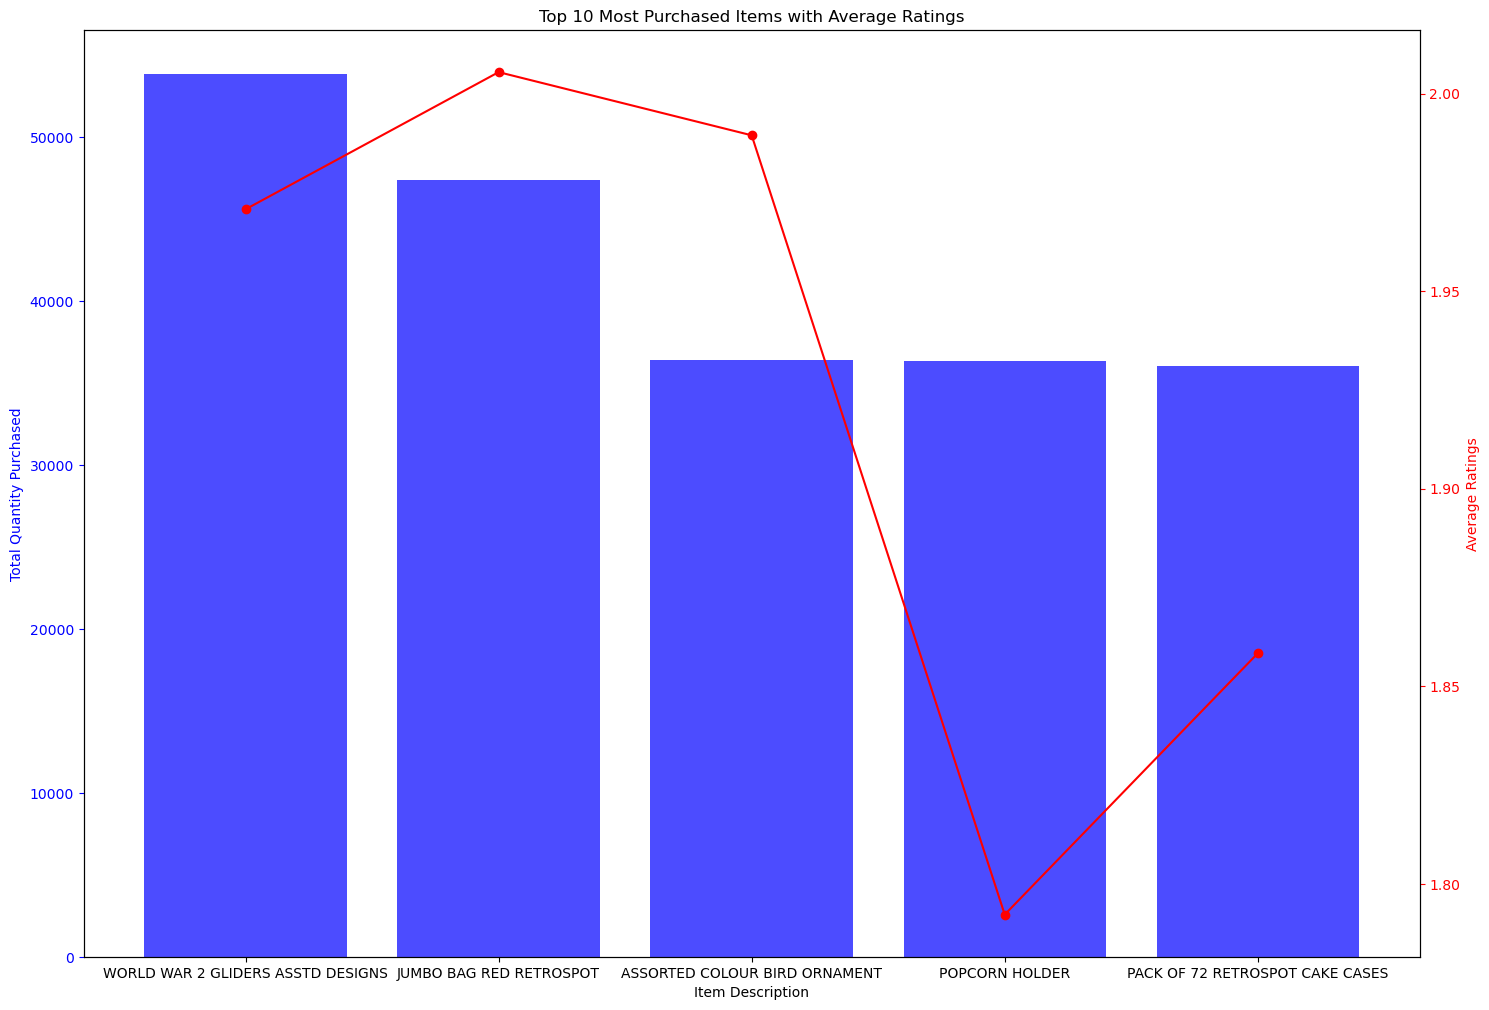

In [104]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.bar(top_5_items.index, top_5_items['Quantity'], color='b', alpha=0.7, label='Quantity Purchased')
ax1.set_xlabel('Item Description')
ax1.set_ylabel('Total Quantity Purchased', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(top_5_items.index, top_5_items['ratings'], color='r', marker='o', label='Average Ratings')
ax2.set_ylabel('Average Ratings', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Top 10 Most Purchased Items with Average Ratings')
plt.show()

In [105]:
#Run polarity score on the entire dataset

import pandas as pd
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df.head(10)

id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
5  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
6  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
7  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
8  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
9  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
5    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
6    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
7    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
8    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
9    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
3  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
4  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
5  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
6  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
7  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
8  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
9  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   

  reviews.rating                                 reviews.sourceURLs  \
0            5.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
1            5.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
2            4.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
3            5.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
4            5.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
5            NaN  http://www.amazon.com/Kindle-Paperwhite-High-R...   
6            NaN  http://www.amazon.com/Kindle-Paperwhite-High-R...   
7            NaN  http://www.amazon.com/Kindle-Paperwhite-High-R...   
8            NaN  http://www.amazon.com/Kindle-Paperwhite-High-R...   
9            NaN  http://www.amazon.com/Kindle-Paperwhite-High-R...   

                                        reviews.text  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   
5  My previous kindle was a DX, this is my second...   
6  Allow me to preface this with a little history...   
7  Just got mine right now. Looks the same as the...   
8  I initially had trouble deciding between the p...   
9  I am enjoying it so far. Great for reading. Ha...   

                                       reviews.title reviews.userCity  \
0                     Paperwhite voyage, no regrets!              NaN   
1                  One Simply Could Not Ask For More              NaN   
2         Great for those that just want an e-reader              NaN   
3                           Love / Hate relationship              NaN   
4                                          

In [106]:
from tqdm import tqdm
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download NLTK resources (only need to do this once)
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

def perform_sentiment_analysis(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words and word not in string.punctuation]

    # Join the cleaned tokens into a string
    cleaned_text = ' '.join(tokens)

    # Initialize the Sentiment Intensity Analyzer
    sia = SentimentIntensityAnalyzer()

    # Perform sentiment analysis
    sentiment_scores = sia.polarity_scores(cleaned_text)

    # Determine sentiment category
    if sentiment_scores['compound'] >= 0.05:
        sentiment = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, sentiment_scores

# Initialize tqdm with the number of reviews
for index, row in tqdm(reviews_df.iterrows(), total=len(reviews_df), desc="Analyzing Sentiments"):
    review = row['reviews.text']
    sentiment, sentiment_scores = perform_sentiment_analysis(review)
    
    # Add sentiment information to the DataFrame or do other processing
    reviews_df.at[index, 'sentiment'] = sentiment
    reviews_df.at[index, 'compound_score'] = sentiment_scores['compound']

# Display processed DataFrame
print(reviews_df.head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pratham/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/pratham/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pratham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Analyzing Sentiments: 100%|████████████████| 1597/1597 [00:04<00:00, 325.65it/s]

                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2 

In [107]:
reviews_df[['reviews.text','sentiment','compound_score']].head(20)

reviews.text sentiment  \
0   I initially had trouble deciding between the p...  Positive   
1   Allow me to preface this with a little history...  Positive   
2   I am enjoying it so far. Great for reading. Ha...  Positive   
3   I bought one of the first Paperwhites and have...  Positive   
4   I have to say upfront - I don't like coroporat...  Positive   
5   My previous kindle was a DX, this is my second...  Positive   
6   Allow me to preface this with a little history...  Positive   
7   Just got mine right now. Looks the same as the...  Positive   
8   I initially had trouble deciding between the p...  Positive   
9   I am enjoying it so far. Great for reading. Ha...  Positive   
10  As reviewed by the wife This is the perfect th...  Positive   
11  My new Kindle Paperwhite came from the USA to ...  Positive   
12  I am enjoying it so far. Great for reading. Ha...  Positive   
13  Had older model, that you could text to speech...  Positive   
14  This is a review of the Kindle Paperwhite laun...  Positive   
15  I love my kindle! I got one for my fiance on h...  Positive   
16  Vraiment bon petit appareil , lger et facile d...   Neutral   
17  Exactly what it is supposed to be. Works great...  Positive   
18  Trs heureux que les livres soient sur Icloud. ...   Neutral   
19  Only 4 stars because I found it very confusing...  Positive   

    compound_score  
0           0.9643  
1           0.9827  
2           0.3818  
3           0.9545  
4           0.9948  
5           0.2075  
6           0.9827  
7           0.9433  
8           0.9643  
9           0.3818  
10          0.9638  
11          0.9806  
12          0.3818  
13          0.6808  
14          0.9995  
15          0.9898  
16          0.0000  
17          0.9186  
18          0.0000  
19          0.9348

In [108]:
reviews_df[['reviews.text','sentiment','compound_score']].tail(20)

reviews.text sentiment  \
1577  Purchased the replacement controll because the...  Positive   
1578  UPDATE: After 3 months of minimal use the remo...  Positive   
1579  These remotes are terrible and basically dispo...  Negative   
1580  Second remote. Stopped working. Will not work ...  Negative   
1581  My remote went out just a couple weeks after w...  Positive   
1582  Product is what it is: if you're like me and m...  Positive   
1583  Remote didn't work, did all the troubleshootin...  Negative   
1584  Update 12/26/2016: No longer will pair with 2n...  Positive   
1585  My fire stick (non voice activated) seemed to ...  Negative   
1586  All in all I love this remote! It's pretty sma...  Positive   
1587  I am now having to order my third remote becau...  Positive   
1588  Don't bother paying for one or getting a repla...  Negative   
1589  I've had the REPLACEMENT remote 3 months and i...  Positive   
1590  Voice remote gave out nearly a year after I pu...  Positive   
1591  Purchased my first one with the TV Fire box ov...  Negative   
1592  This is not the same remote that I got for my ...  Negative   
1593  I have had to change the batteries in this rem...  Negative   
1594  Remote did not activate, nor did it connect to...  Negative   
1595  It does the job but is super over priced. I fe...  Positive   
1596  I ordered this item to replace the one that no...  Negative   

      compound_score  
1577          0.8316  
1578          0.7479  
1579         -0.5106  
1580         -0.5994  
1581          0.6124  
1582          0.4767  
1583         -0.4939  
1584          0.1779  
1585         -0.3400  
1586          0.1689  
1587          0.8568  
1588         -0.7823  
1589          0.1531  
1590          0.1027  
1591         -0.0772  
1592         -0.6249  
1593         -0.7579  
1594         -0.8126  
1595          0.7003  
1596         -0.6249

<Axes: title={'center': 'Amazon Review Dataset Sentiment Analysis'}>

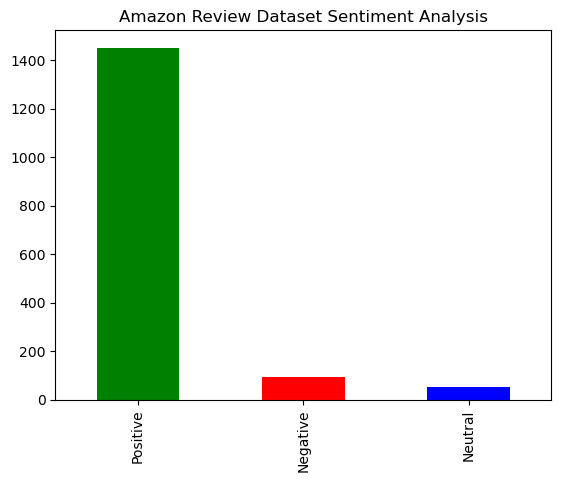

In [109]:
plt.title('Amazon Review Dataset Sentiment Analysis')
reviews_df['sentiment'].value_counts().plot(kind='bar',color=['green','red','blue'])